In [2]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
import pandas as pd                                # to work with dataframes
import numpy as np                                 # to work with numpy arrays
import gzip                                        # to extract work file from zip file
import nltk                                        # working with nlp algorithms
from nltk.sentiment import SentimentIntensityAnalyzer  # To predict the sentiments based on the text                   
from sklearn.linear_model import LogisticRegression  # Classification algorithm
from sklearn.feature_extraction.text import TfidfVectorizer # To convert text to numerical based on tfidf score
from nltk.corpus import stopwords                  # to detect stopwords
import re                                          # to find or match strings
from nltk.corpus import stopwords                  # to detect stopwords
from sklearn.metrics import classification_report  # Classification report
from sklearn.metrics import accuracy_score         # evaluation metric
from sklearn.metrics import f1_score               # evaluation metric
from sklearn.metrics import recall_score           # evaluation metric
from sklearn.metrics import precision_score        # evaluation metric
from sklearn.model_selection import train_test_split # train test split
import time                                        # to check the processing time
from sklearn.preprocessing import LabelEncoder     # To convert categorical to numerical
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans                 #Clustering algorithm
import warnings                                    # To ignore the warnings
warnings.filterwarnings('ignore')   
import string 

import matplotlib.pyplot as plt                    # for data visualisation
import seaborn as sns                              #for statistical representation
import time                                        # to check the processing time


In [3]:
kindle= pd.read_json("C:/khanna/NIIT/Capstrone/Kindle_Store.json.gz", lines = True, nrows =  200000)
kindle.head(1)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,True,"12 29, 2012",A27UD5HYAKBL97,1423600150,{'Format:': ' Hardcover'},Cheryl,If you like making salsas this is a great book...,Great Book,1356739200,NaN,NaN


In [4]:
meta = pd.read_json("C:/khanna/NIIT/Capstrone/meta_Kindle_Store.json.gz", lines = True, nrows =  200000)
meta.head(1)

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,"[Kindle Store, Kindle eBooks, Science Fiction ...",,[],,,"[B007NLCJBC, B01FARODH8]",,Arthur K. Barnes,[],"1,716,849 Paid in Kindle Store (","[B000FBF81K, B00PBDMER8]","{'File Size:': '295 KB', 'Print Length:': '113...",Buy a Kindle,,NaT,,B000FA5KKA,[],[]


In [5]:
data1 = kindle[['asin', 'reviewText', 'overall', 'unixReviewTime','reviewerName' ,'reviewTime', 'reviewerID','summary','verified']]
# Feature Selection for data1
data1.head(1)

,asin,reviewText,overall,unixReviewTime,reviewerName,reviewTime,reviewerID,summary,verified
0,1423600150,If you like making salsas this is a great book...,4,1356739200,Cheryl,"12 29, 2012",A27UD5HYAKBL97,Great Book,True


In [6]:
data2 = meta[['asin', 'title', 'category', 'brand']]   # Feature Selection for data2
data2.head(1)

,asin,title,category,brand
0,B000FA5KKA,,"[Kindle Store, Kindle eBooks, Science Fiction ...",Arthur K. Barnes


In [7]:
K_data = pd.merge(data1, data2, on = 'asin')   #combining data1 and data2
K_data.head(3)

,asin,reviewText,overall,unixReviewTime,reviewerName,reviewTime,reviewerID,summary,verified,title,category,brand
0,B000FA5KK0,"Enjoyed the read. A bit of a twist to it, fun ...",3,1412985600,Timothy Isaacson,"10 11, 2014",A36PGTGIU6TWY2,western with a twist.,True,,"[Kindle Store, Kindle eBooks, Literature & Fic...",Visit Amazon's Max Brand Page
1,B000FA5KK0,I have enjoyed all work by this author,5,1412467200,George,"10 5, 2014",A176WT5VCAX69W,Five Stars,True,,"[Kindle Store, Kindle eBooks, Literature & Fic...",Visit Amazon's Max Brand Page
2,B000FA5KK0,"pretty good story, a little exaggerated, but I...",4,1404345600,sandra sue marsolek,"07 3, 2014",A2LSKD2H9U8N0J,pretty good story,True,,"[Kindle Store, Kindle eBooks, Literature & Fic...",Visit Amazon's Max Brand Page


### DATA EXPLORATION

In [8]:
K_data.shape   #check numbers of rows and coumns in the dataset

(192626, 12)

In [9]:
K_data.describe()   #statistical discription of numerical columns

,overall,unixReviewTime
count,192626.000000,1.926260e+05
mean,4.163005,1.371190e+09
std,1.194643,7.655328e+07
min,1.000000,8.718624e+08
25%,4.000000,1.336781e+09
50%,5.000000,1.374278e+09
75%,5.000000,1.417219e+09
max,5.000000,1.528330e+09


In [10]:
K_data.info()     #information of all the columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192626 entries, 0 to 192625
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   asin            192626 non-null  object
 1   reviewText      192594 non-null  object
 2   overall         192626 non-null  int64 
 3   unixReviewTime  192626 non-null  int64 
 4   reviewerName    192619 non-null  object
 5   reviewTime      192626 non-null  object
 6   reviewerID      192626 non-null  object
 7   summary         192604 non-null  object
 8   verified        192626 non-null  bool  
 9   title           192626 non-null  object
 10  category        192626 non-null  object
 11  brand           192626 non-null  object
dtypes: bool(1), int64(2), object(9)
memory usage: 17.8+ MB


# Dataset Details

This file has 
reviewer ID - Id of the Reviewer, e.g. A2SUAM1J3GNN3B,

reviewer Name - Name of the Reviewer,

reviewer text - Text of the review ,

summary(obtained from Reviewer text)summary of the review,

overall Rating on a scale 5,

asin - ID of the product, e.g. B000FA5KK0

reviewText - text of the review

overall - rating of the product

unixReviewTime - time of the review (unix time)

ReviewTime - time of the review (raw)

brand - brand of the product

title - title of the kindle 

# DATA PREPROCESSING

In [11]:
K_data = K_data.astype('str').drop_duplicates() # dropping duplicate rows from the string columns

In [12]:
K_data.shape

(179991, 12)

In [13]:
K_data.isnull().sum()  # checking null values

asin              0
reviewText        0
overall           0
unixReviewTime    0
reviewerName      0
reviewTime        0
reviewerID        0
summary           0
verified          0
title             0
category          0
brand             0
dtype: int64

#Since no null values are there , so no need for data imputation

# DATA CLEANING

In [14]:
# Creating cleaning function
import re
def cleaning(text):
    text = re.sub("[^0-9A-Za-z\-]+", " ", text) 
    text = re.sub("(?<!\w)\d+", "", text)
    text = re.sub("-(?!\w)", "", text)
    text = " ".join(text.split())
    text = text.lower()
    return text

In [15]:
# Calling the cleaning function for reviewText column
K_data["reviewText"] = K_data["reviewText"].apply(cleaning)

In [16]:
# Calling the cleaning function for summary column
K_data["summary"] = K_data["summary"].apply(cleaning)

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\komal
[nltk_data]     khanna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
stop_words = set(stopwords.words('english'))

punctuations=string.punctuation

K_data['processed_text']=K_data['reviewText'].apply(lambda x: ' '.join([word.lower() for word in str(x).split() if word not in stop_words and word not in punctuations]))

K_data['summary_text']=K_data['summary'].apply(lambda x: ' '.join([word.lower() for word in str(x).split() if word not in stop_words and word not in punctuations]))

K_data['text']=K_data['processed_text']+" "+K_data['summary_text']

In [19]:
K_data.sample(6)

,asin,reviewText,overall,unixReviewTime,reviewerName,reviewTime,reviewerID,summary,verified,title,category,brand,processed_text,summary_text,text
154076,B004W3UG7S,the book explain all the different importing p...,5,1397433600,De Neve Didier,"04 14, 2014",A1S7C9A17X0DED,very nice book,True,Import Export Business Plan,"['Kindle Store', 'Kindle eBooks', 'Business & ...",Visit Amazon's Perry Belcher Page,book explain different importing processes act...,nice book,book explain different importing processes act...
134257,B004RQ8WEO,this was one of my favorite ebooks that i ve r...,5,1359417600,Non&#039;s Babes,"01 29, 2013",A2R0B9E9RXVRMH,loved this book,True,Scratch - Kindle edition,"['Kindle Store', 'Kindle eBooks', 'Literature ...",Visit Amazon's Danny Gillan Page,one favorite ebooks read long time laughed lou...,loved book,one favorite ebooks read long time laughed lou...
44167,B001BPYMCU,this is the first book i ve read that thows aw...,5,1124496000,MnADL,"08 20, 2005",A2QLKGXV6SFDIY,this book is life changing,False,The Total Money Makeover,"['Kindle Store', 'Kindle eBooks', 'Business & ...",Visit Amazon's Dave Ramsey Page,first book read thows away fancy models throws...,book life changing,first book read thows away fancy models throws...
178637,B0051BO40U,follow the money was a delicious beginning to ...,4,1306627200,Patti,"05 29, 2011",A342CVF2IAR61C,so much story for so little dough,False,Follow the Money - Kindle edition,"['Kindle Store', 'Kindle eBooks', 'Mystery, Th...",Visit Amazon's Fingers Murphy Page,follow money delicious beginning summer readin...,much story little dough,follow money delicious beginning summer readin...
162732,B004XJCTRQ,here s a great story it s one that you don t t...,4,1395878400,NJacques,"03 27, 2014",A3BUJW9BHUDKS,friendship launch day,True,Friendship: Launch Day - Kindle edition,"['Kindle Store', 'Kindle eBooks', ""Children's ...",Visit Amazon's S J MacDonald Page,great story one think first going intro story ...,friendship launch day,great story one think first going intro story ...
101134,B004DWLGGS,this was an experiment just to see if this g k...,4,1358726400,Joyce Newman,"01 21, 2013",A296G4H39QLAC4,blackjack,True,Blackjack,"['Kindle Store', 'Kindle eBooks', 'Humor & Ent...",Amazon Digital Services,experiment see g kindle could handle games exc...,blackjack,experiment see g kindle could handle games exc...


In [20]:
K_data.drop(['summary', 'reviewText','processed_text','summary_text'], axis=1, inplace=True)
K_data.head(2)

,asin,overall,unixReviewTime,reviewerName,reviewTime,reviewerID,verified,title,category,brand,text
0,B000FA5KK0,3,1412985600,Timothy Isaacson,"10 11, 2014",A36PGTGIU6TWY2,True,,"['Kindle Store', 'Kindle eBooks', 'Literature ...",Visit Amazon's Max Brand Page,enjoyed read bit twist fun trying figure going...
1,B000FA5KK0,5,1412467200,George,"10 5, 2014",A176WT5VCAX69W,True,,"['Kindle Store', 'Kindle eBooks', 'Literature ...",Visit Amazon's Max Brand Page,enjoyed work author five stars


In [21]:
# Checking Information
K_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179991 entries, 0 to 192625
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   asin            179991 non-null  object
 1   overall         179991 non-null  object
 2   unixReviewTime  179991 non-null  object
 3   reviewerName    179991 non-null  object
 4   reviewTime      179991 non-null  object
 5   reviewerID      179991 non-null  object
 6   verified        179991 non-null  object
 7   title           179991 non-null  object
 8   category        179991 non-null  object
 9   brand           179991 non-null  object
 10  text            179991 non-null  object
dtypes: object(11)
memory usage: 16.5+ MB


In [26]:
# converting the data type of overall with integer type
K_data.overall= K_data.overall.astype('int8')

In [23]:
# converting the data type of reviewTime with date type
K_data['reviewTime'] = pd.to_datetime(K_data['reviewTime'])

# SENTIMENT ANALYSIS

What is sentiment analysis?
- Sentiment analysis is a text analysis method that detects polarity (e.g. a positive or negative opinion) within the text, a whole document, paragraph, sentence, or clause.
- Sentiment analysis aims to measure the attitude, sentiments, evaluations, attitudes, and emotions of a speaker/writer based on the computational treatment of subjectivity in a text.

In [27]:
# Assigning the Positive , Negative and Neutral Sentiment on the basis of overall column
a=[]
for x in K_data['overall']: 
    if x>3:
        x='Positive'
        a.append(x)
    elif x==3:
        x='Neutral'
        a.append(x)
    else:
        x='Negitive'
        a.append(x)

In [28]:
K_data['Sentiment'] =  a

In [29]:
K_data.head(3)

,asin,overall,unixReviewTime,reviewerName,reviewTime,reviewerID,verified,title,category,brand,text,Sentiment
0,B000FA5KK0,3,1412985600,Timothy Isaacson,"10 11, 2014",A36PGTGIU6TWY2,True,,"['Kindle Store', 'Kindle eBooks', 'Literature ...",Visit Amazon's Max Brand Page,enjoyed read bit twist fun trying figure going...,Neutral
1,B000FA5KK0,5,1412467200,George,"10 5, 2014",A176WT5VCAX69W,True,,"['Kindle Store', 'Kindle eBooks', 'Literature ...",Visit Amazon's Max Brand Page,enjoyed work author five stars,Positive
2,B000FA5KK0,4,1404345600,sandra sue marsolek,"07 3, 2014",A2LSKD2H9U8N0J,True,,"['Kindle Store', 'Kindle eBooks', 'Literature ...",Visit Amazon's Max Brand Page,pretty good story little exaggerated liked pre...,Positive


# VADER

- "VADER" refers to the "Valence Aware Dictionary and sEntiment Reasoner." VADER is a lexicon and rule-based sentiment analysis tool that uses a list of words and their associated sentiment scores to determine the overall sentiment of a piece of text..
- VADER is particularly well-suited for analyzing social media text because it is able to handle the unique language and style of social media posts, which often include emoticons, slang, and misspellings. It is also able to detect sentiment nuances such as sarcasm, which can be difficult for other sentiment analysis tools to detect accurately.
- Example -"Today is a beautiful day! I love the sunshine and warm weather ☀️🌞❤️"
We can use VADER to analyze the sentiment of this tweet as follows:
VADER would identify the words "beautiful," "love," "sunshine," and "warm" as positive sentiment words and assign them positive sentiment scores.
VADER would also identify the emoticons ☀️🌞❤️ as positive sentiment indicators and adjust the sentiment score accordingly.
VADER would then combine the sentiment scores of all the words and emoticons in the tweet and calculate an overall sentiment score.
In this case, VADER would likely assign a highly positive sentiment score to the tweet due to the overwhelmingly positive sentiment expressed in the text and emoticons.

In [30]:
# downloding the vader lexicon 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\komal
[nltk_data]     khanna\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [31]:
# Getting the polarity of reviewText 
from tqdm.notebook import tqdm                     # library for adding progress bar
res2 = {}
t = 0
for i, j in tqdm(K_data.iterrows(), total=len(K_data)):
    text = j['text']
    res2[t] = SentimentIntensityAnalyzer().polarity_scores(text)
    t = t + 1

  0%|          | 0/179991 [00:00<?, ?it/s]

In [32]:
# Transposing the dataframe
k = pd.DataFrame(res2).T
k

,neg,neu,pos,compound
0,0.000,0.606,0.394,0.8442
1,0.000,0.548,0.452,0.5106
2,0.024,0.309,0.666,0.9818
3,0.000,0.699,0.301,0.6808
4,0.070,0.475,0.456,0.9042
...,...,...,...,...
179986,0.140,0.748,0.112,-0.3430
179987,0.000,0.551,0.449,0.9793
179988,0.000,0.445,0.555,0.9136
179989,0.083,0.559,0.358,0.9853


In [33]:
# concating the main data and the Polarity Scores
M_data = pd.concat([K_data, k], axis = 1)

In [34]:
M_data.isnull().sum()

asin              12634
overall           12634
unixReviewTime    12634
reviewerName      12634
reviewTime        12634
reviewerID        12634
verified          12634
title             12634
category          12634
brand             12634
text              12634
Sentiment         12634
neg               12634
neu               12634
pos               12634
compound          12634
dtype: int64

In [35]:
# Dropping the null values
M_data.dropna(inplace = True)

In [36]:
# Creating the Class column based on compound column
M_data.insert(0, 'Class', np.nan)
M_data.loc[M_data['compound']>=0.05, 'Class'] = 'pos'
M_data.loc[M_data['compound']<=-0.05, 'Class'] = 'neg'
M_data.loc[((M_data['compound'] > -0.05) & (M_data['compound'] < 0.05)), 'Class'] = 'neu'

In [37]:
# giving the datetiem index for reviewtime on the basis of year and month
M_data['year'] = pd.DatetimeIndex(M_data['reviewTime']).year
M_data['month'] = pd.DatetimeIndex(M_data['reviewTime']).month

In [38]:
M_data.isnull().sum()

Class             0
asin              0
overall           0
unixReviewTime    0
reviewerName      0
reviewTime        0
reviewerID        0
verified          0
title             0
category          0
brand             0
text              0
Sentiment         0
neg               0
neu               0
pos               0
compound          0
year              0
month             0
dtype: int64

In [39]:
M_data.shape

(167357, 19)

In [40]:
# converting thedata into CSV file
M_data.to_csv("M_data_kindle_final.csv")

# TEXT CLASSIFICATION

Text classification also known as text tagging or text categorization is the process of categorizing text into organized groups. By using Natural Language Processing (NLP), text classifiers can automatically analyze text and then assign a set of pre-defined tags or categories based on its content.

In [4]:
# importing the data set which we have created
df = pd.read_csv("C:/Users/komal khanna/Downloads/M_data_kindle_final.csv")
df.head()

,Unnamed: 0,Class,asin,overall,unixReviewTime,reviewerName,reviewTime,reviewerID,verified,title,category,brand,text,Sentiment,neg,neu,pos,compound,year,month
0,0,pos,B000FA5KK0,3.0,1412985600,Timothy Isaacson,2014-10-11,A36PGTGIU6TWY2,True,NaN,"['Kindle Store', 'Kindle eBooks', 'Literature ...",Visit Amazon's Max Brand Page,enjoyed read bit twist fun trying figure going...,Neutral,0.000,0.606,0.394,0.8442,2014,10
1,1,pos,B000FA5KK0,5.0,1412467200,George,2014-10-05,A176WT5VCAX69W,True,NaN,"['Kindle Store', 'Kindle eBooks', 'Literature ...",Visit Amazon's Max Brand Page,enjoyed work author five stars,Positive,0.000,0.548,0.452,0.5106,2014,10
2,2,pos,B000FA5KK0,4.0,1404345600,sandra sue marsolek,2014-07-03,A2LSKD2H9U8N0J,True,NaN,"['Kindle Store', 'Kindle eBooks', 'Literature ...",Visit Amazon's Max Brand Page,pretty good story little exaggerated liked pre...,Positive,0.024,0.309,0.666,0.9818,2014,7
3,3,pos,B000FA5KK0,5.0,1401062400,Tpl,2014-05-26,A2QP13XTJND1QS,True,NaN,"['Kindle Store', 'Kindle eBooks', 'Literature ...",Visit Amazon's Max Brand Page,read max brand westerns know expect treat let ...,Positive,0.000,0.699,0.301,0.6808,2014,5
4,4,pos,B000FA5KK0,5.0,1392681600,Wayne Harrill,2014-02-18,A1B26H4XPQ1FKP,True,NaN,"['Kindle Store', 'Kindle eBooks', 'Literature ...",Visit Amazon's Max Brand Page,missed reading rare treasure thank allowing pl...,Positive,0.070,0.475,0.456,0.9042,2014,2


In [5]:
# dropping the 'Unnamed: 0' column
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
df.isnull().sum()

Class                 0
asin                  0
overall               0
unixReviewTime        0
reviewerName         11
reviewTime            0
reviewerID            0
verified              0
title             23122
category              0
brand               640
text                  0
Sentiment             0
neg                   0
neu                   0
pos                   0
compound              0
year                  0
month                 0
dtype: int64

In [7]:
df.drop('title', axis = 1, inplace = True)

In [8]:
df.isnull().sum()

Class               0
asin                0
overall             0
unixReviewTime      0
reviewerName       11
reviewTime          0
reviewerID          0
verified            0
category            0
brand             640
text                0
Sentiment           0
neg                 0
neu                 0
pos                 0
compound            0
year                0
month               0
dtype: int64

In [9]:
# dropping the null values
df.dropna(inplace = True)

In [10]:
df.shape

(166706, 18)

In [48]:
# For WordCloud
from wordcloud import WordCloud, STOPWORDS        # For Word Cloud
stopwords = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "black",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(str(df['text']))
    fig = plt.figure(figsize = (10, 10))
    plt.axis("off")
    if title: 
        fig.suptitle(title, fontsize=18)
        fig.subplots_adjust(top=2.25)
    plt.imshow(wordcloud)
    plt.show()

In [49]:
neg=df[df["Sentiment"] == "Negitive"]["text"]
pos=df[df["Sentiment"] == "Positive"]["text"]
neu=df[df["Sentiment"] == "Neutral"]["text"]

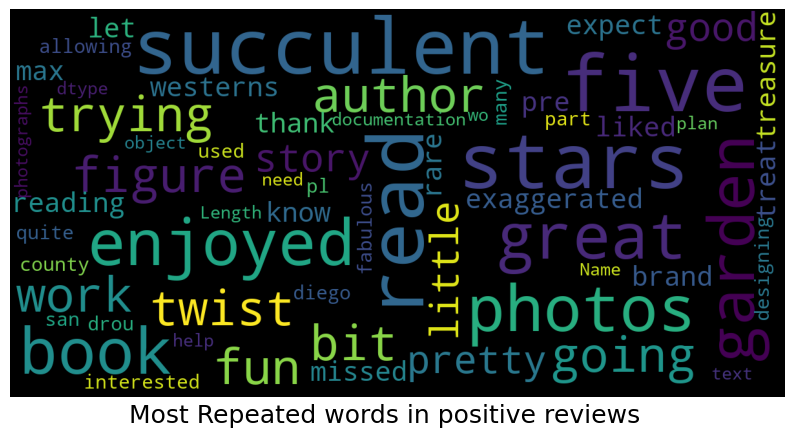

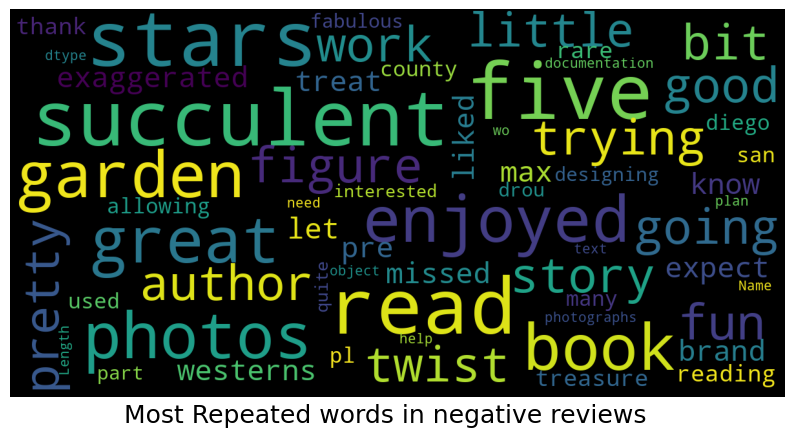

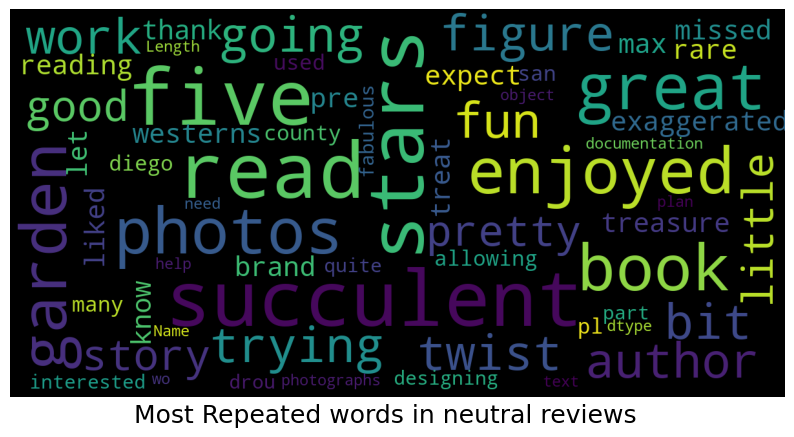

In [50]:
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")
word_cloud(neu, "Most Repeated words in neutral reviews")

# NGRAMS

In [51]:
def documentNgrams(documents, size):
    ngrams_all = []
    for document in documents:
        tokens = document.split()
        if len(tokens) <= size:
            continue
        else:
            output = list(ngrams(tokens, size))
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
    cnt_ngram = Counter()
    for word in ngrams_all:
        cnt_ngram[word] += 1
    df = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()
    df = df.rename(columns={'index':'words', 0:'count'})
    df = df.sort_values(by='count', ascending=False)
    df = df.head(15)
    df = df.sort_values(by='count')
    return(df)

In [125]:
def plotNgrams(documents):
    unigrams = documentNgrams(documents, 1)
    bigrams = documentNgrams(documents, 2)
    trigrams = documentNgrams(documents, 3)
    
    # Set plot figure size
    fig = plt.figure(figsize = (25, 20))
    plt.subplots_adjust(wspace=.5)

    ax = fig.add_subplot(131)
    ax.barh(np.arange(len(unigrams['words'])), unigrams['count'], align='center', alpha=.5 ,color ='yellow')
    ax.set_title('Unigrams')
    plt.yticks(np.arange(len(unigrams['words'])), unigrams['words'])
    plt.xlabel('Count')

    ax2 = fig.add_subplot(132)
    ax2.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=.5 ,color ='cyan')
    ax2.set_title('Bigrams')
    plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
    plt.xlabel('Count')

    ax3 = fig.add_subplot(133)
    ax3.barh(np.arange(len(trigrams['words'])), trigrams['count'], align='center', alpha=.5,color ='green')
    ax3.set_title('Trigrams')
    plt.yticks(np.arange(len(trigrams['words'])), trigrams['words'])
    plt.xlabel('Count')

    plt.show()

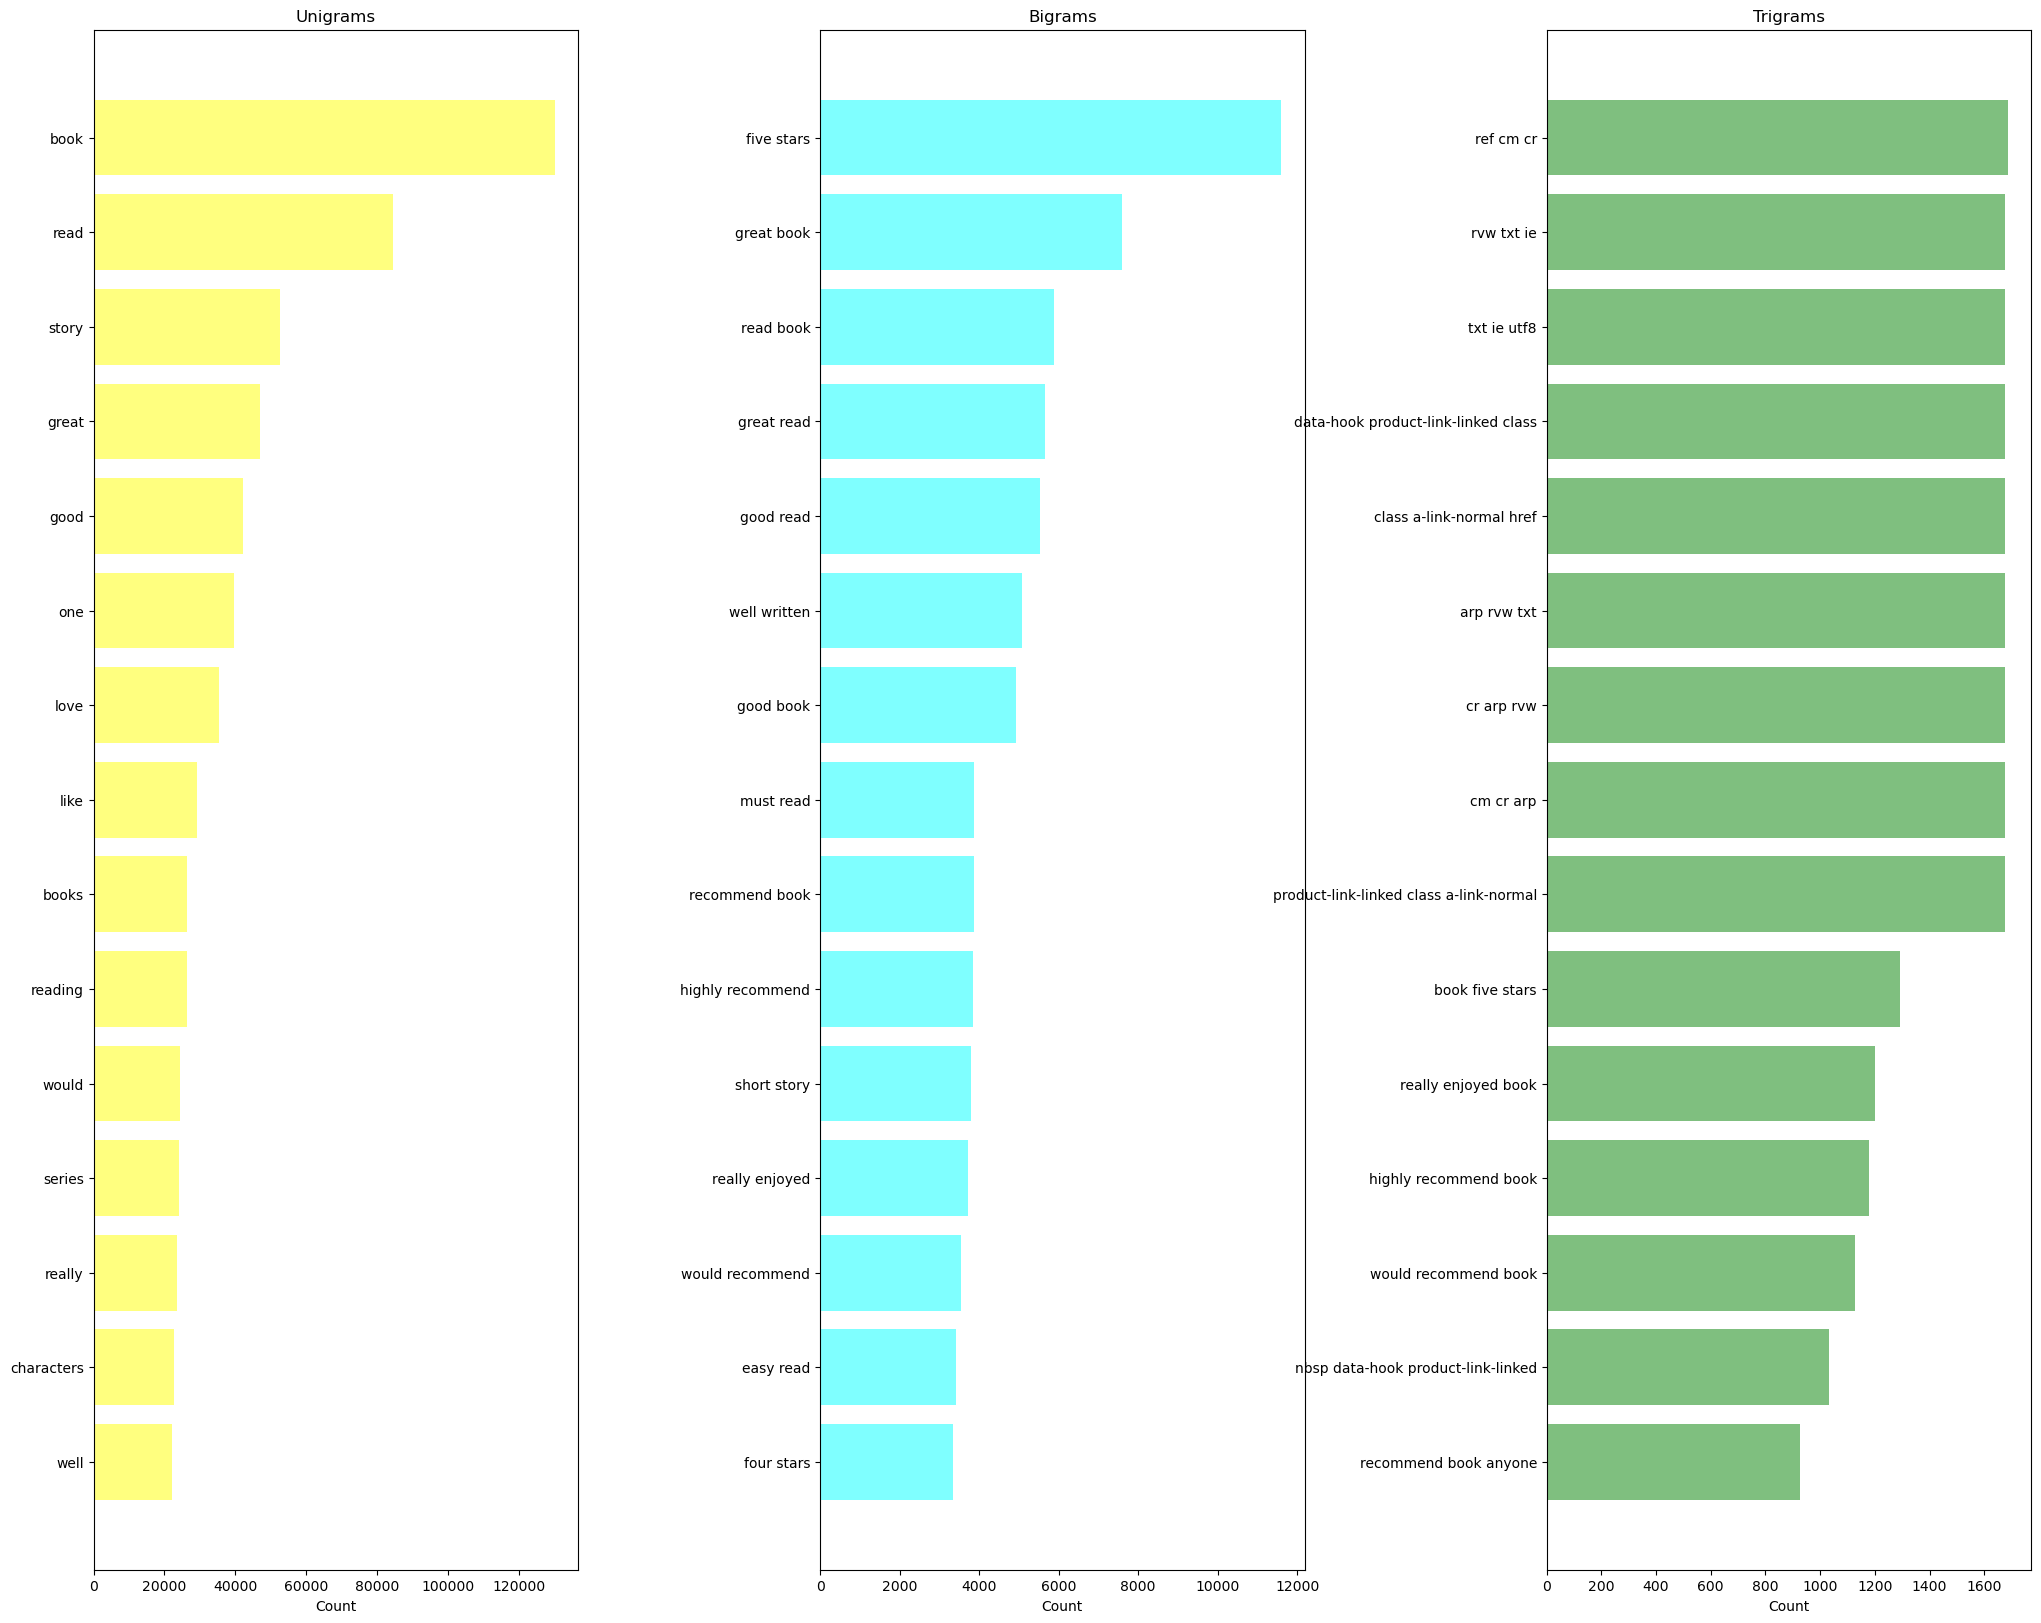

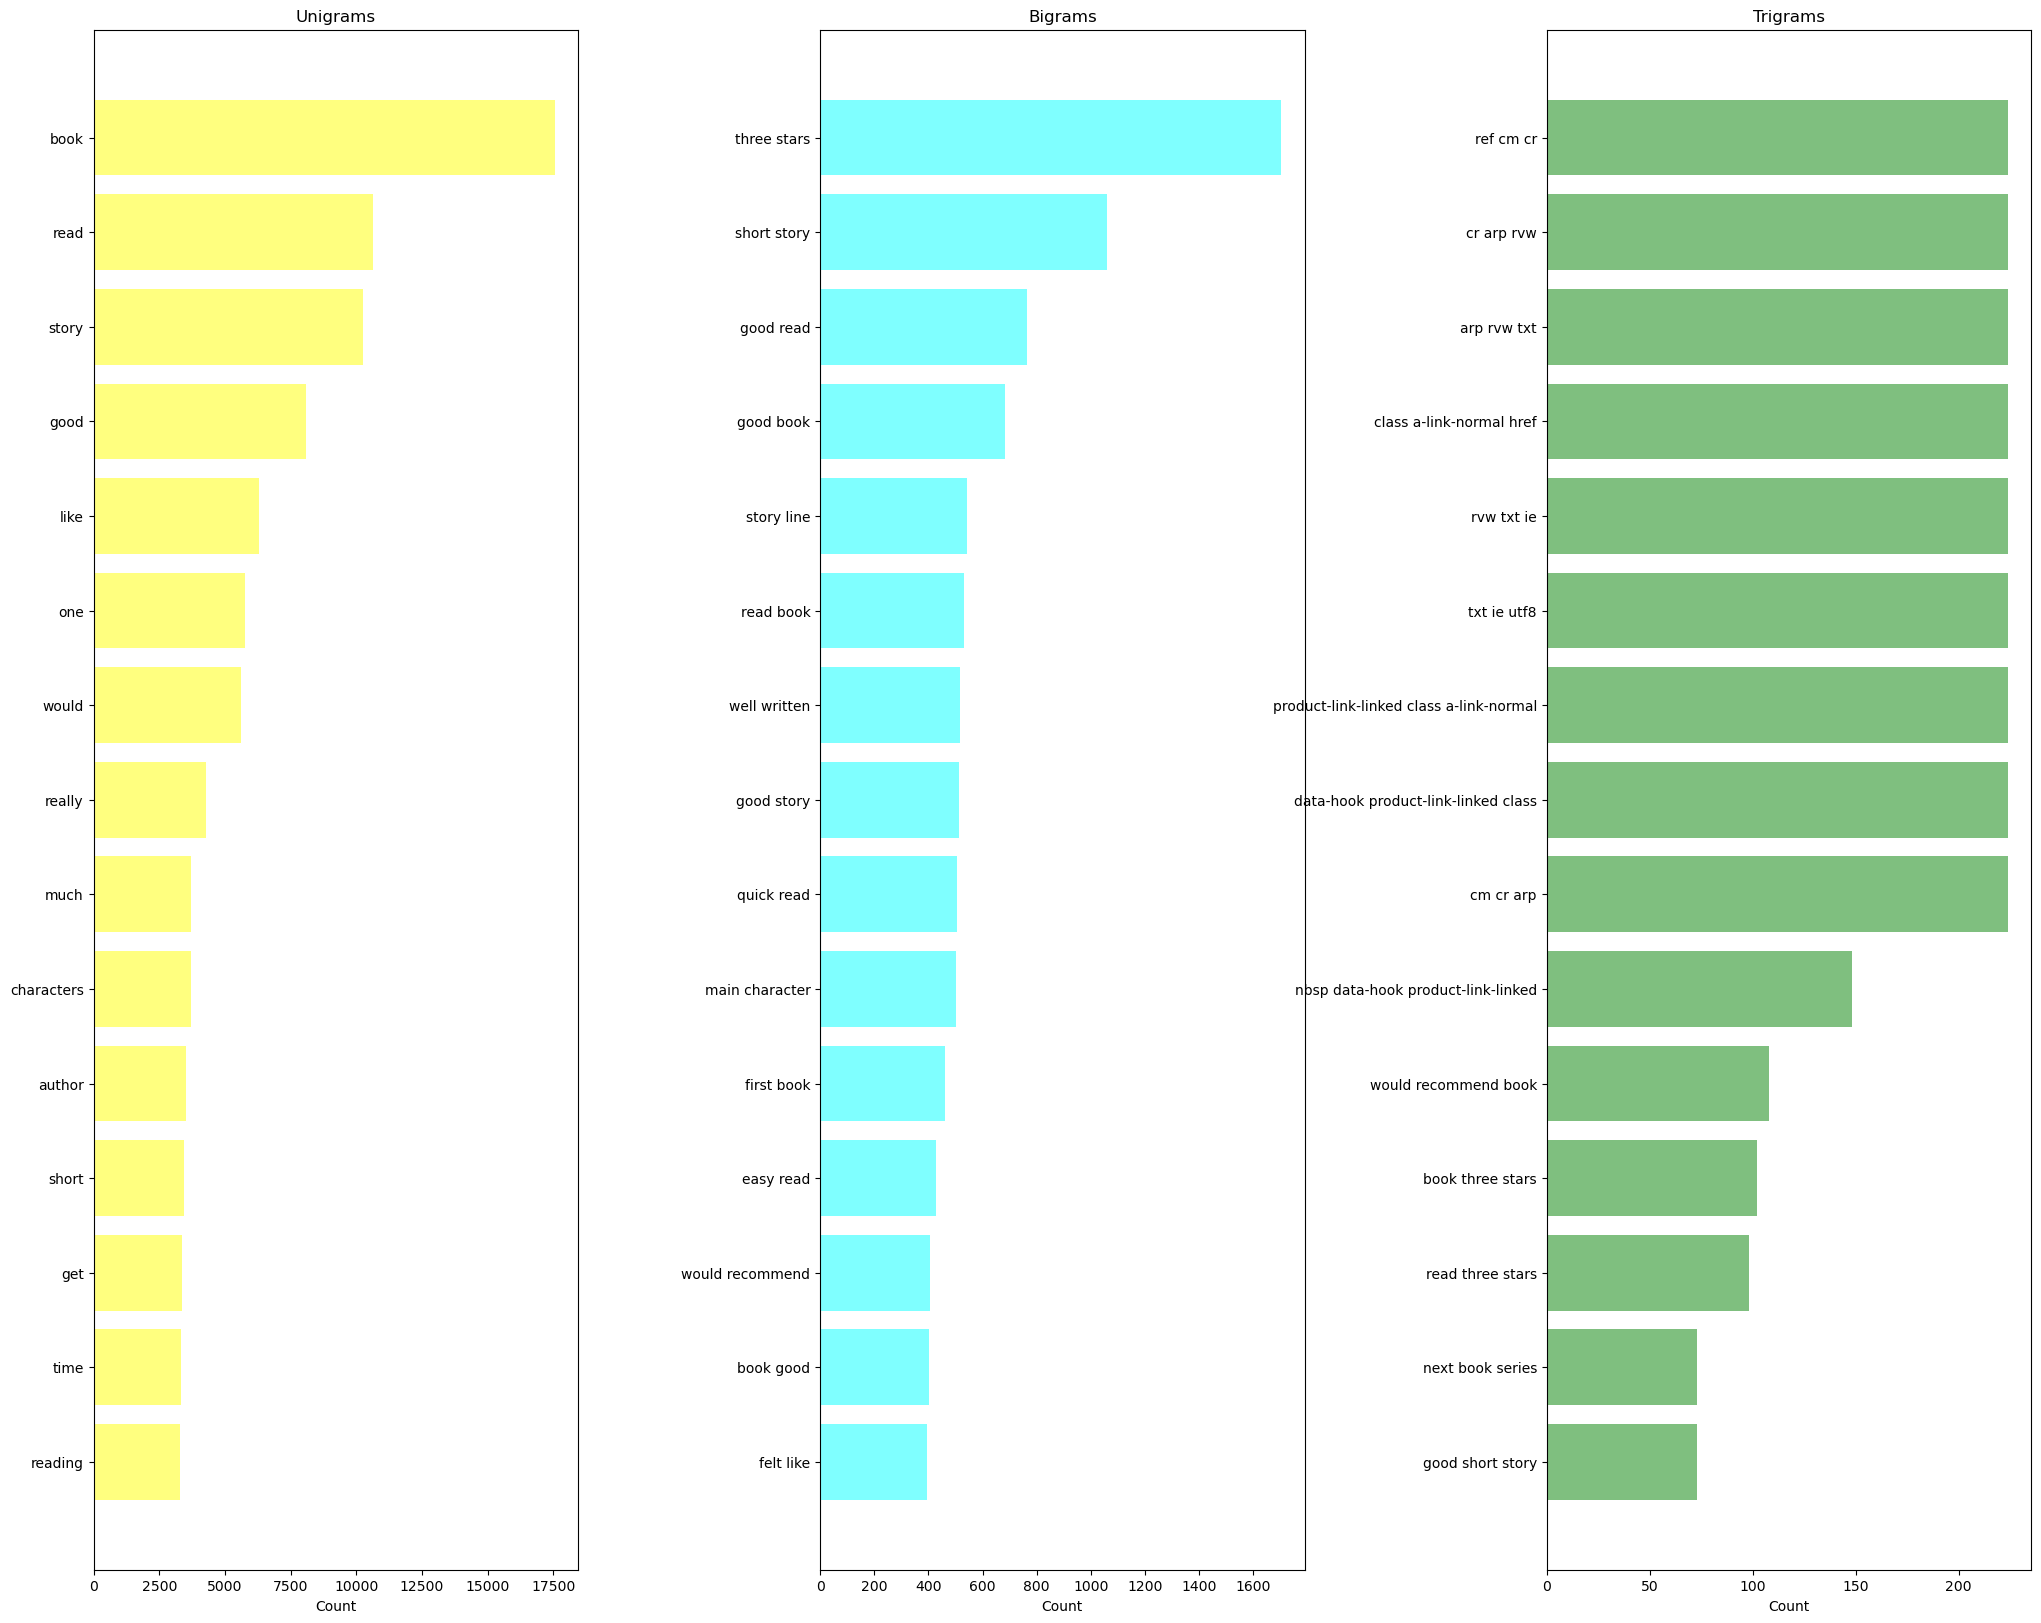

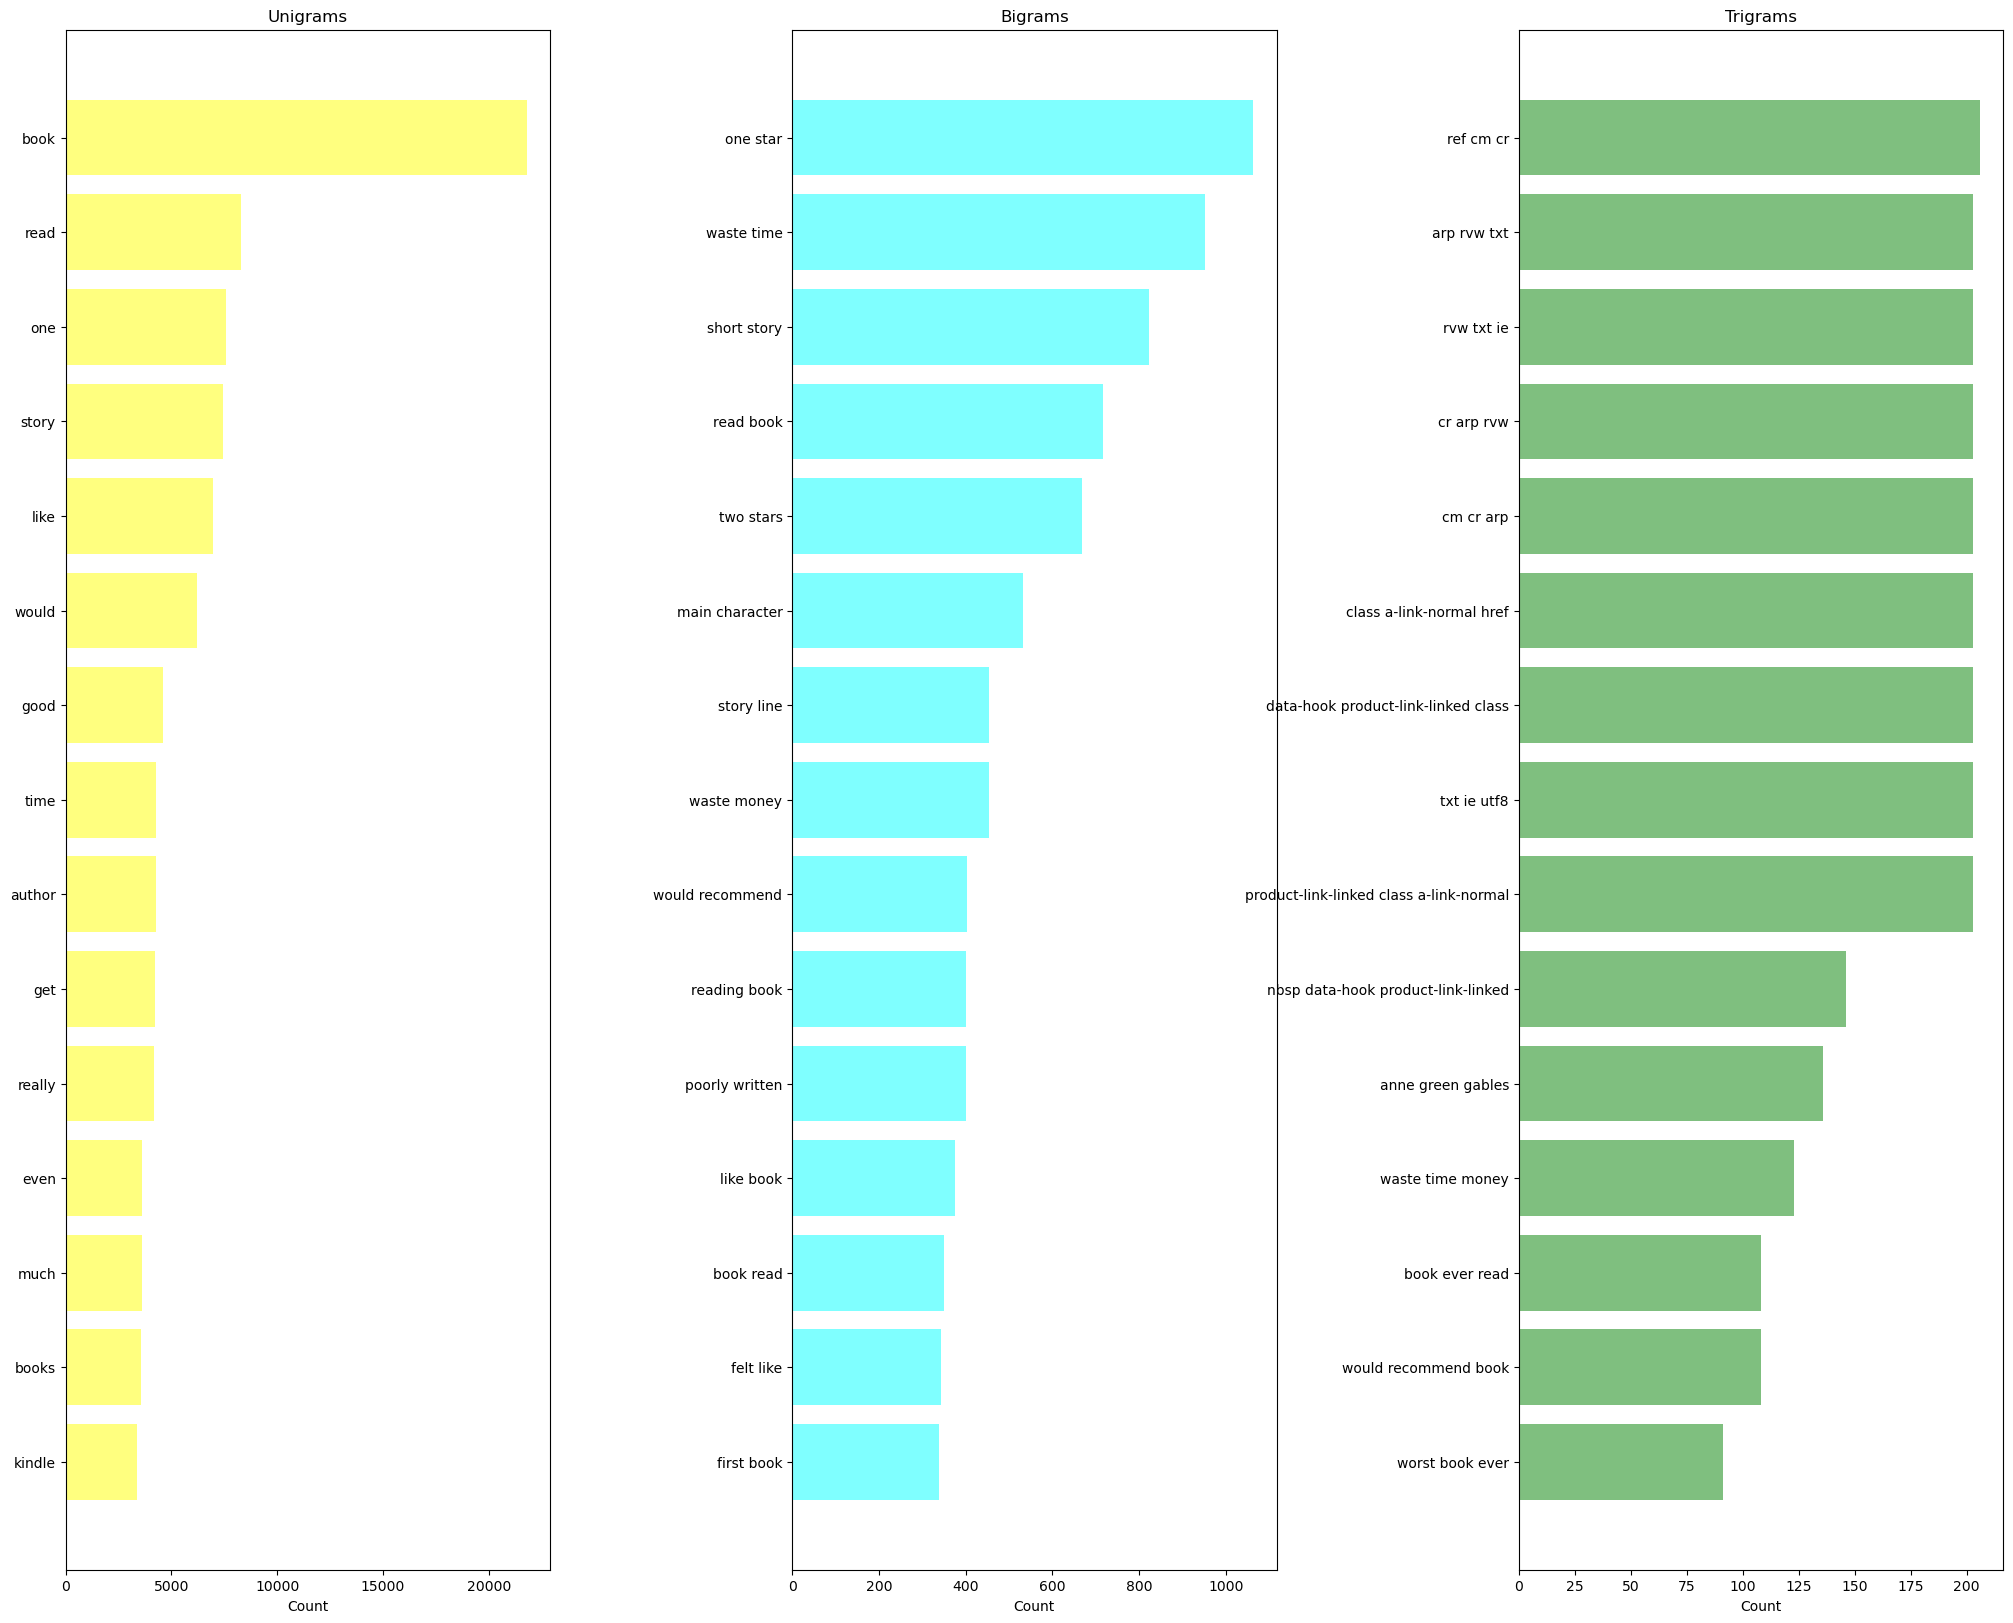

In [126]:
#Filtering data
import nltk
from collections import Counter
from nltk.util import ngrams
review_pos = df[df["Sentiment"]=='Positive'].dropna()
review_neu = df[df["Sentiment"]=='Neutral'].dropna()
review_neg = df[df["Sentiment"]=='Negitive'].dropna()
plotNgrams(review_pos.text)
plotNgrams(review_neu.text)
plotNgrams(review_neg.text)

# CLASSIFICATION

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [55]:
x_train,x_test,y_train,y_test=train_test_split(df.text,df.Sentiment,test_size=0.2,random_state=42)

In [56]:
vectorizer=TfidfVectorizer()
x_train=vectorizer.fit_transform(x_train)
x_test=vectorizer.transform(x_test)

In [57]:
log_reg = LogisticRegression()
d_tree = DecisionTreeClassifier()
r_forrest = RandomForestClassifier()
knn = KNeighborsClassifier()
naive_bayes = MultinomialNB()


model_map = {0:'Logistic Regression', 1:'Decision Tree', 2:'Random Forrest', 3:'KNN',4:"Naive Bayes"}
models = [log_reg, d_tree, r_forrest, knn, naive_bayes]

In [ ]:
for i,model in enumerate(models):
    
    models[i].fit(x_train, y_train)
    y_pred = models[i].predict(x_test)
    y_train_pred = models[i].predict(x_train)
    
    print('Report of {}:' .format(model_map[i]))
    print('Train set accuracy of {}: {:.5f} %'.format(model_map[i], accuracy_score(y_train, y_train_pred)*100))
    print('Test set accuracy of {}: {:.5f} %'.format(model_map[i], accuracy_score(y_test, y_pred)*100))
    print('\n')
    print(classification_report(y_test, y_pred))
    print('\n')
    print('\n')

Report of Logistic Regression:
Train set accuracy of Logistic Regression: 88.69110 %
Test set accuracy of Logistic Regression: 86.53950 %


              precision    recall  f1-score   support

    Negitive       0.76      0.64      0.70      3911
     Neutral       0.61      0.30      0.40      3519
    Positive       0.89      0.98      0.93     25912

    accuracy                           0.87     33342
   macro avg       0.75      0.64      0.68     33342
weighted avg       0.85      0.87      0.85     33342





Report of Decision Tree:
Train set accuracy of Decision Tree: 99.97826 %
Test set accuracy of Decision Tree: 77.73379 %


              precision    recall  f1-score   support

    Negitive       0.49      0.46      0.47      3911
     Neutral       0.34      0.30      0.31      3519
    Positive       0.87      0.89      0.88     25912

    accuracy                           0.78     33342
   macro avg       0.56      0.55      0.56     33342
weighted avg       0.77    

Interpretation - Logistic Regression and Random Forest gives the best accuracy i.e, 87% and 82% respectively among all the models including Decision Tree , KNN, Naive Bayesthen it can be concluded that these models are a good fit for the specific problem and data being analyzed.
- The dataset being used may have features that are well-suited to Logistic Regression and Random Forest. For example, if the dataset has a large number of input features, Random Forest may be able to capture the underlying patterns better than other models. If the input features have a linear relationship with the target variable, Logistic Regression may be able to make more accurate predictions.
- Overall, it's important to evaluate the performance of different models using multiple metrics and to carefully consider the specific problem and data being analyzed before choosing a model.

# TIME SERIES ANALYSIS

In [11]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller,acf,pacf
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error

In [12]:
# importing the data set which we have created
df1 = pd.read_csv("C:/Users/komal khanna/Downloads/M_data_kindle_final.csv")
df1.head()

,Unnamed: 0,Class,asin,overall,unixReviewTime,reviewerName,reviewTime,reviewerID,verified,title,category,brand,text,Sentiment,neg,neu,pos,compound,year,month
0,0,pos,B000FA5KK0,3.0,1412985600,Timothy Isaacson,2014-10-11,A36PGTGIU6TWY2,True,NaN,"['Kindle Store', 'Kindle eBooks', 'Literature ...",Visit Amazon's Max Brand Page,enjoyed read bit twist fun trying figure going...,Neutral,0.000,0.606,0.394,0.8442,2014,10
1,1,pos,B000FA5KK0,5.0,1412467200,George,2014-10-05,A176WT5VCAX69W,True,NaN,"['Kindle Store', 'Kindle eBooks', 'Literature ...",Visit Amazon's Max Brand Page,enjoyed work author five stars,Positive,0.000,0.548,0.452,0.5106,2014,10
2,2,pos,B000FA5KK0,4.0,1404345600,sandra sue marsolek,2014-07-03,A2LSKD2H9U8N0J,True,NaN,"['Kindle Store', 'Kindle eBooks', 'Literature ...",Visit Amazon's Max Brand Page,pretty good story little exaggerated liked pre...,Positive,0.024,0.309,0.666,0.9818,2014,7
3,3,pos,B000FA5KK0,5.0,1401062400,Tpl,2014-05-26,A2QP13XTJND1QS,True,NaN,"['Kindle Store', 'Kindle eBooks', 'Literature ...",Visit Amazon's Max Brand Page,read max brand westerns know expect treat let ...,Positive,0.000,0.699,0.301,0.6808,2014,5
4,4,pos,B000FA5KK0,5.0,1392681600,Wayne Harrill,2014-02-18,A1B26H4XPQ1FKP,True,NaN,"['Kindle Store', 'Kindle eBooks', 'Literature ...",Visit Amazon's Max Brand Page,missed reading rare treasure thank allowing pl...,Positive,0.070,0.475,0.456,0.9042,2014,2


In [13]:
df1.dropna(inplace= True)

In [14]:
# dropping the 'Unnamed: 0' column
df1.drop('Unnamed: 0', axis = 1, inplace = True)

In [15]:
df1.isnull().sum()

Class             0
asin              0
overall           0
unixReviewTime    0
reviewerName      0
reviewTime        0
reviewerID        0
verified          0
title             0
category          0
brand             0
text              0
Sentiment         0
neg               0
neu               0
pos               0
compound          0
year              0
month             0
dtype: int64

In [16]:
df1['reviewTime'] = pd.to_datetime(df1['reviewTime'])

In [17]:
trial = df1.copy()
trial.set_index('reviewTime',drop=True,inplace=True) #set reviewtime as index 
trial.sort_index(inplace=True)

In [18]:
trial.head(1)

,Class,asin,overall,unixReviewTime,reviewerName,reviewerID,verified,title,category,brand,text,Sentiment,neg,neu,pos,compound,year,month
reviewTime,,,,,,,,,,,,,,,,,,
1997-08-18,pos,B002VNFNY2,4.0,871862400,ctskinner@acay.com.au,A2N347YEJR9X8I,False,The Origins of Virtue (Penguin Press Science) ...,"['Kindle Store', 'Kindle eBooks', 'Politics & ...",Visit Amazon's Matt Ridley Page,origins virtue matt ridley mr wrote red queen ...,Positive,0.025,0.708,0.267,0.9924,1997,8


In [19]:
df1.title.value_counts()

 The Total Money Makeover                                                                                  5744
Thinking, Fast and Slow - Kindle edition                                                                   2914
The Color of Heaven (The Color of Heaven Series Book 1) - Kindle edition                                   2731
War and Peace                                                                                              2225
A Modern Witch (A Modern Witch Series: Book 1) - Kindle edition                                            1918
                                                                                                           ... 
The Flint Lord (The Pagans Book 2) - Kindle edition                                                           1
The Prisoner&#39;s Release and Other Stories - Kindle edition                                                 1
Prescription for Life - Kindle edition                                                                  

In [20]:
def checkStationarity(test):
    pvalue = adfuller(test)[1]
    if(pvalue>0.05):
        msg = 'p-value={}. Data is not stationary , so make it stationary'.format(pvalue)
    else:
        msg='p-value={}. Data is stationary'.format(pvalue)
    return(msg)

In [85]:
positive=trial[(trial['Class'] =='pos') & (trial['title']=='War and Peace')]  # Positive
negative=trial[(trial['Class'] == 'neg') & (trial['title']=='War and Peace')]  #Negative
neutral=trial[(trial['Class'] == 'neu') & (trial['title']=='War and Peace')]    #Neutral

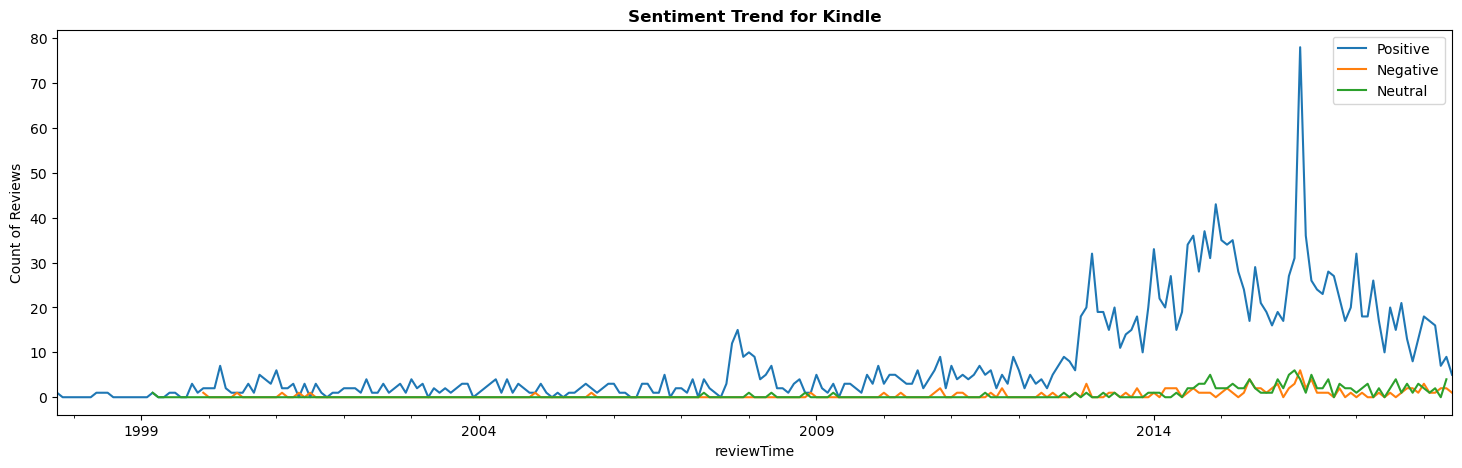

In [86]:
positive['reviewerID'].resample('M').count().plot(figsize=(18,5),label='Positive')
negative['reviewerID'].resample('M').count().plot(figsize=(18,5),label='Negative')
neutral['reviewerID'].resample('M').count().plot(figsize=(18,5),label='Neutral')
plt.legend()
plt.title('Sentiment Trend for Kindle',fontweight='bold')
plt.ylabel('Count of Reviews');

In [87]:
decomposition_p=seasonal_decompose(np.asarray(positive['reviewerID'].resample('M').count()), period=12)
d_trend_p=decomposition_p.trend
d_seasonal_p=decomposition_p.seasonal
d_residual_p=decomposition_p.resid

decomposition=seasonal_decompose(np.asarray(neutral['reviewerID'].resample('M').count()), period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

decomposition_n=seasonal_decompose(np.asarray(negative['reviewerID'].resample('M').count()), period=12)
d_trend_n=decomposition_n.trend
d_seasonal_n=decomposition_n.seasonal
d_residual_n=decomposition_n.resid

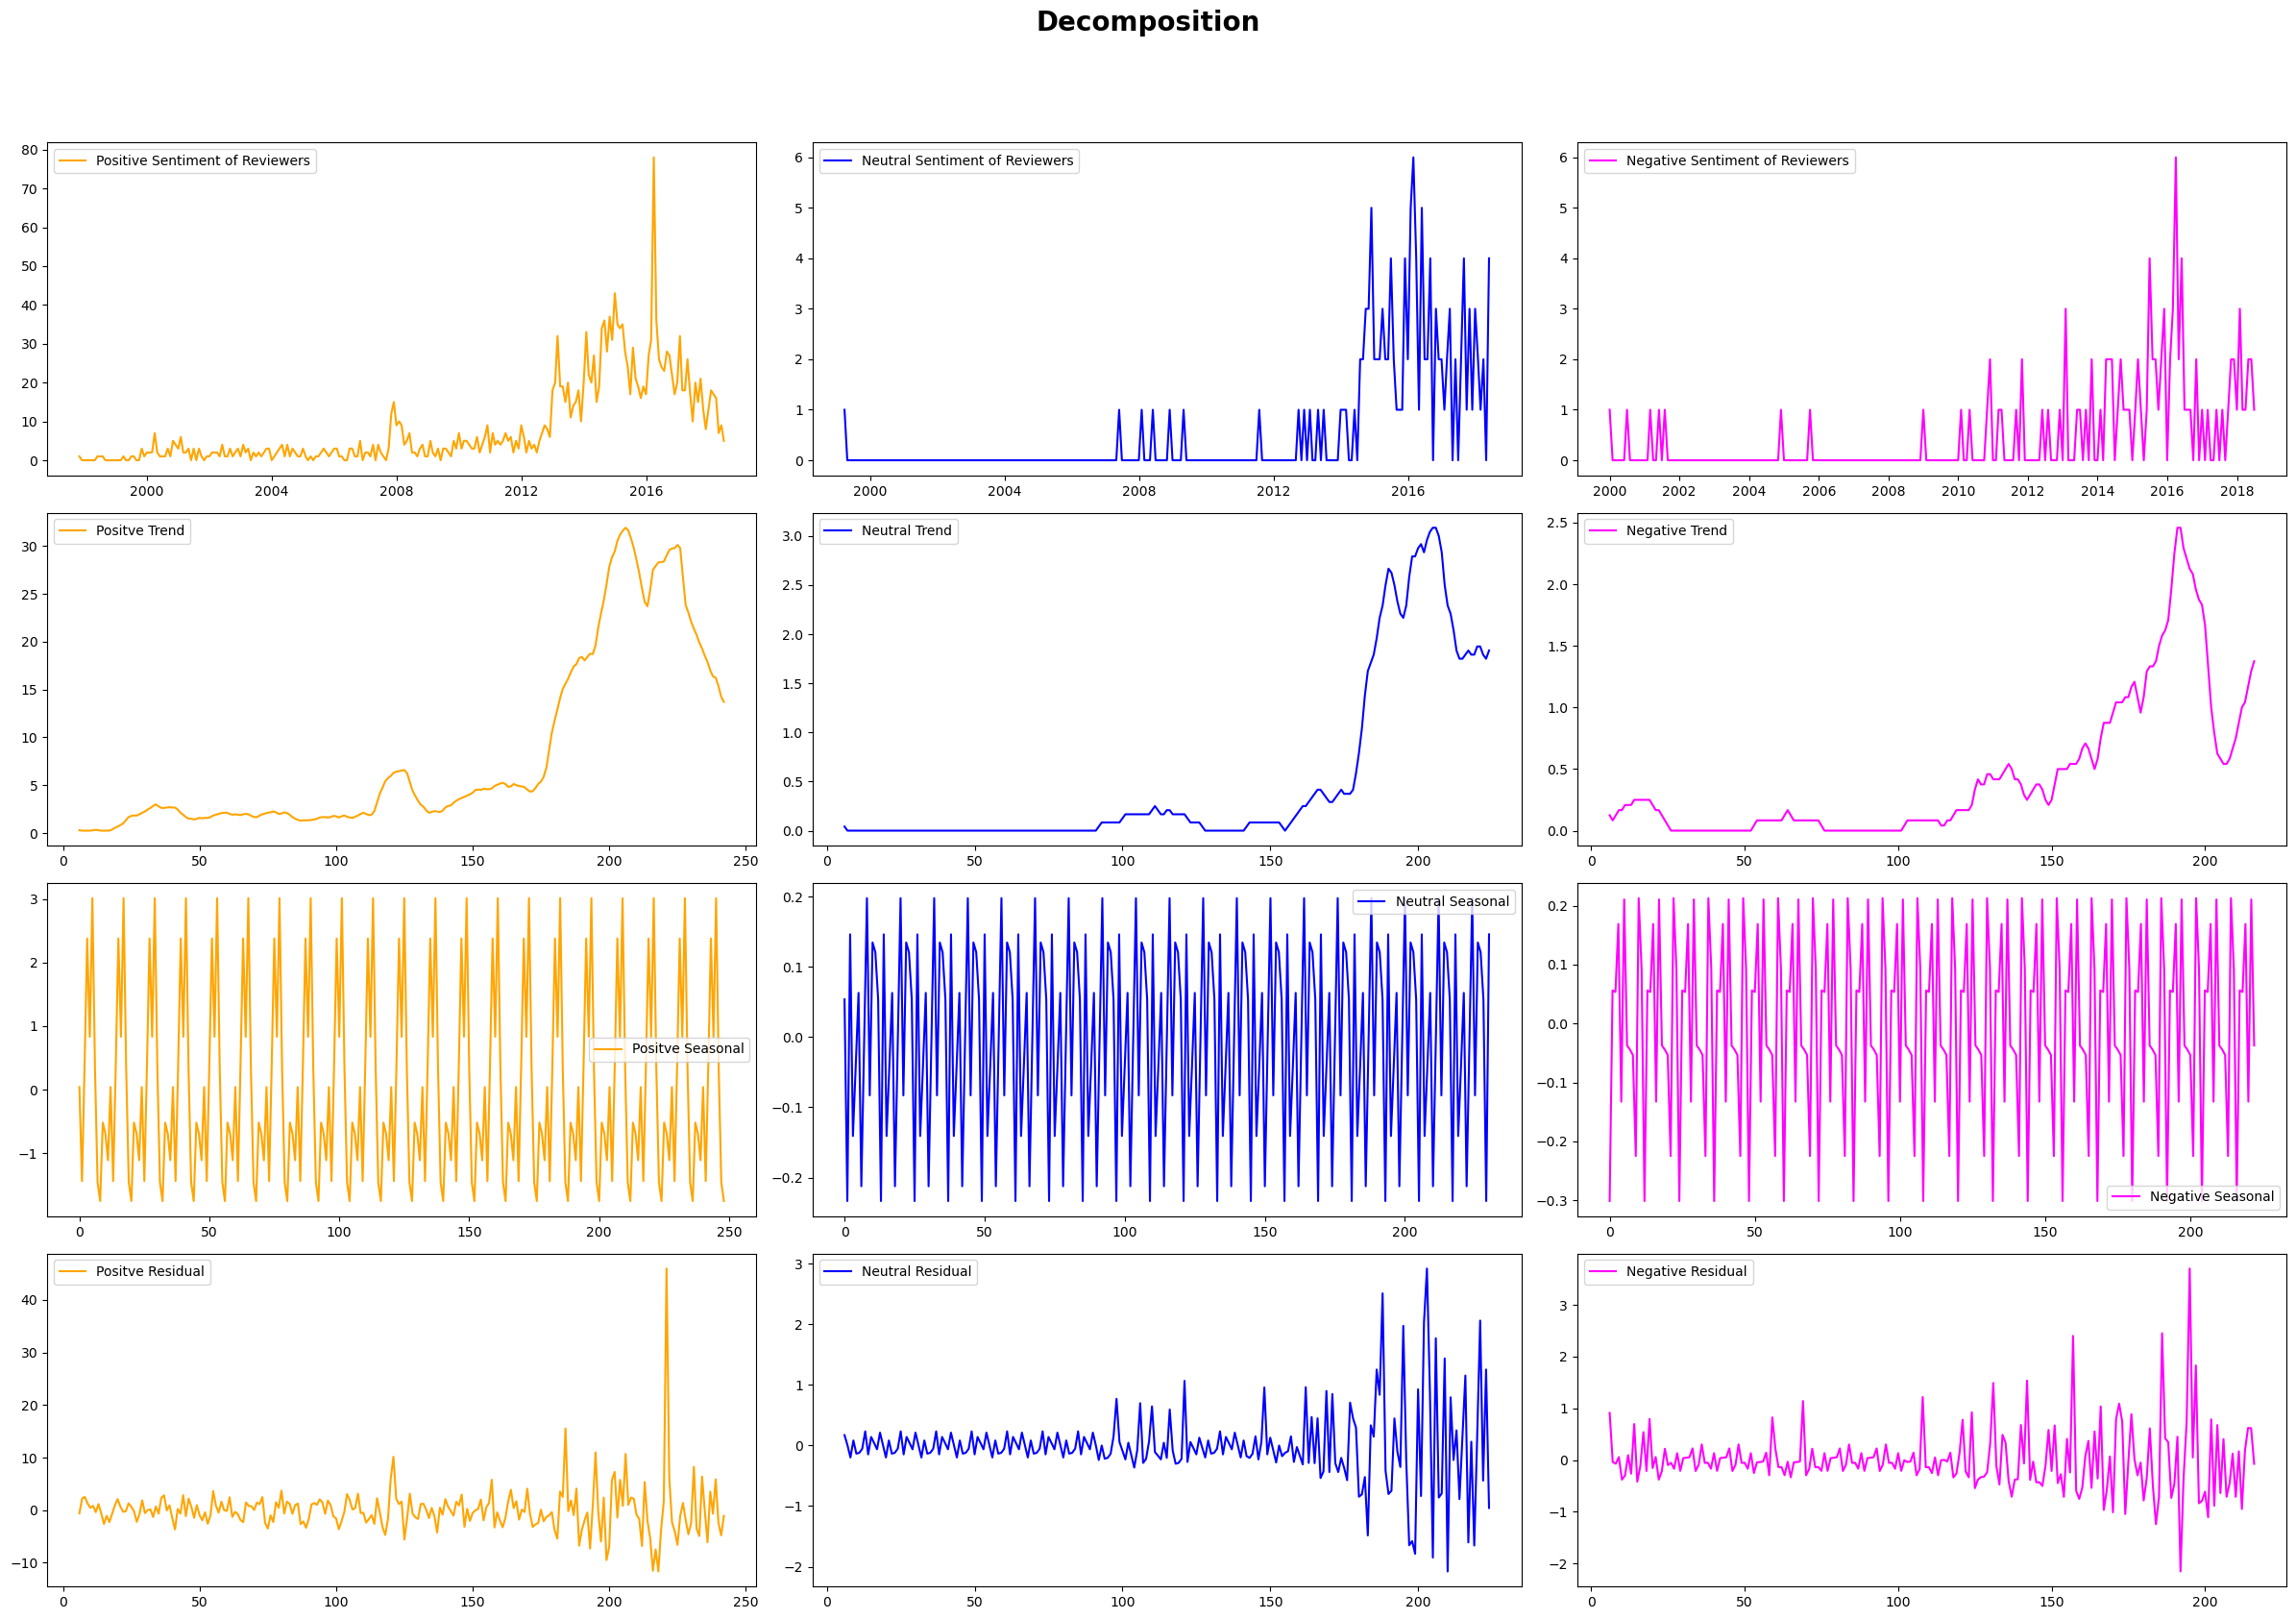

In [88]:
# plotting all the 4 graphs
fig,ax = plt.subplots(4,3,figsize=(24,16))
plt.subplot(4,3,1)
plt.plot(positive['reviewerID'].resample('M').count(),label='Positive Sentiment of Reviewers',color='orange')
plt.legend(loc='best')

plt.subplot(4,3,2)
plt.plot(neutral['reviewerID'].resample('M').count(),label='Neutral Sentiment of Reviewers',color='blue')
plt.legend(loc='best')

plt.subplot(4,3,3)
plt.plot(negative['reviewerID'].resample('M').count(),label='Negative Sentiment of Reviewers',color='magenta')
plt.legend(loc='best')


# Trend
plt.subplot(4,3,4)
plt.plot(d_trend_p,label='Positve Trend',color='orange')
plt.legend(loc='best')

plt.subplot(4,3,5)
plt.plot(d_trend,label='Neutral Trend',color='blue')
plt.legend(loc='best')

plt.subplot(4,3,6)
plt.plot(d_trend_n,label='Negative Trend',color='magenta')
plt.legend(loc='best')


# Seasonality
plt.subplot(4,3,7)
plt.plot(d_seasonal_p,label='Positve Seasonal',color='orange')
plt.legend(loc='best')

plt.subplot(4,3,8)
plt.plot(d_seasonal,label='Neutral Seasonal',color='blue')
plt.legend(loc='best')

plt.subplot(4,3,9)
plt.plot(d_seasonal_n,label='Negative Seasonal',color='magenta')
plt.legend(loc='best')


# Residual
plt.subplot(4,3,10)
plt.plot(d_residual_p,label='Positve Residual',color='orange')
plt.legend(loc='best')

plt.subplot(4,3,11)
plt.plot(d_residual,label='Neutral Residual',color='blue')
plt.legend(loc='best')

plt.subplot(4,3,12)
plt.plot(d_residual_n,label='Negative Residual',color='magenta')
plt.legend(loc='best')

plt.suptitle('Decomposition',x=0.5,y=1.05,fontweight='bold',fontsize=20)
plt.tight_layout()

- The above graph shows that there is Actual dataplot , trend , seasonality and errors/residuals in all three types of sentiments i.e , positive , neutral and negative.
- First plot is actual data plot with monthly dispersed data points.
- Second one shows the trend in the data where we can see there is a trend all the sentiments.
- Third plot shows the seasonality which we can see some repetitions over the period of time.
- Last plot shows the irregularity in the the data over a period of time we can see some irregular kind over a period in the plot

# Stationarity Check

In [89]:
positive1=positive['reviewerID'].resample('M').count()
negative1=negative['reviewerID'].resample('M').count()
neutral1=neutral['reviewerID'].resample('M').count()

In [90]:
checkStationarity(positive1.iloc[round(len(positive1)*0.7):])

'p-value=0.0005361373903813454. Data is stationary'

In [91]:
checkStationarity(negative1.iloc[round(len(negative1)*0.7):])

'p-value=4.907400749144024e-09. Data is stationary'

In [92]:
checkStationarity(neutral1.iloc[round(len(neutral1)*0.7):])

'p-value=0.023113672389935506. Data is stationary'

In [114]:
#diff_pos = positive1- positive1.shift()
#diff_neg = negative1- negative1.shift()
#diff_neu = neutral1 - neutral1.shift()
#diff_pos.dropna(inplace=True)
#diff_neg.dropna(inplace=True)
#diff_neu.dropna(inplace=True)
#diff_pos.head(3),diff_neg.head(3),diff_neu.head(3)

In [31]:
#checkStationarity(diff_pos.iloc[round(len(positive1)*0.7):])

NameError: name 'diff_pos' is not defined

In [116]:
#checkStationarity(diff_pos.iloc[round(len(positive1)*0.8):])

'p-value=0.04063305947157084. Data is stationary'

In [73]:
#checkStationarity(diff_neg.iloc[round(len(diff_neg)*0.7):])

'p-value=5.3111056686306093e-11. Data is stationary'

In [74]:
#checkStationarity(diff_neu.iloc[round(len(diff_neu)*0.7):])

'p-value=6.315791241348475e-07. Data is stationary'

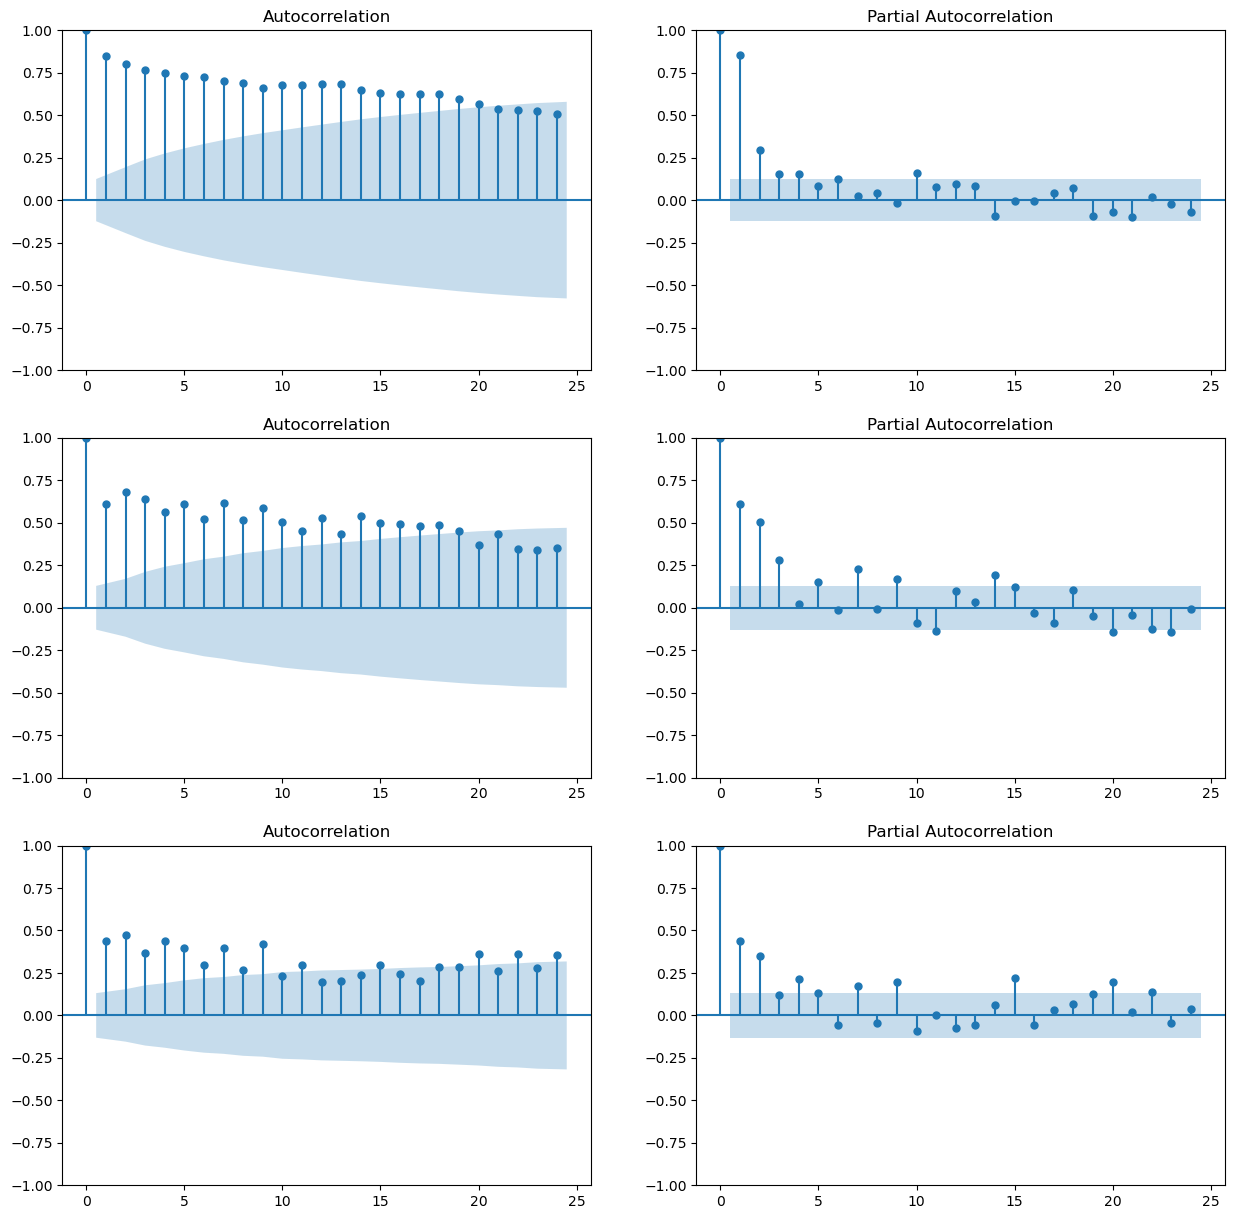

In [93]:
fig,ax=plt.subplots(3,2,figsize=(15,15))
plot_acf(positive1,ax=ax[0,0])
plot_pacf(positive1,ax=ax[0,1])
plot_acf(neutral1,ax=ax[1,0])
plot_pacf(neutral1,ax=ax[1,1])
plot_acf(negative1,ax=ax[2,0])
plot_pacf(negative1,ax=ax[2,1])
plt.show()

# POSITIVE SENTIMENT

### SARIMA


In [94]:
train_pos=positive1[(positive1.index.year >= 2012) & (positive1.index.year <= 2017)]
test_pos=positive1[(positive1.index.year > 2017)]

In [95]:
sarima = SARIMAX(train_pos,order=(1,2,1),seasonal_order=(1,2,1,52)).fit()
sarima_train_pred = sarima.predict(0,(len(train_pos)-1))
sarima_test_pred = sarima.predict(len(train_pos),(len(train_pos)+len(test_pos)-1))
print(sarima.summary())
ljung3 = sm.stats.acorr_ljungbox(sarima.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(f'LJung Box Test Value : {ljung3}')

                                     SARIMAX Results                                      
Dep. Variable:                         reviewerID   No. Observations:                   72
Model:             SARIMAX(1, 2, 1)x(1, 2, 1, 52)   Log Likelihood                   0.000
Date:                            Sat, 13 May 2023   AIC                             10.000
Time:                                    13:26:46   BIC                                nan
Sample:                                01-31-2012   HQIC                               nan
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0   

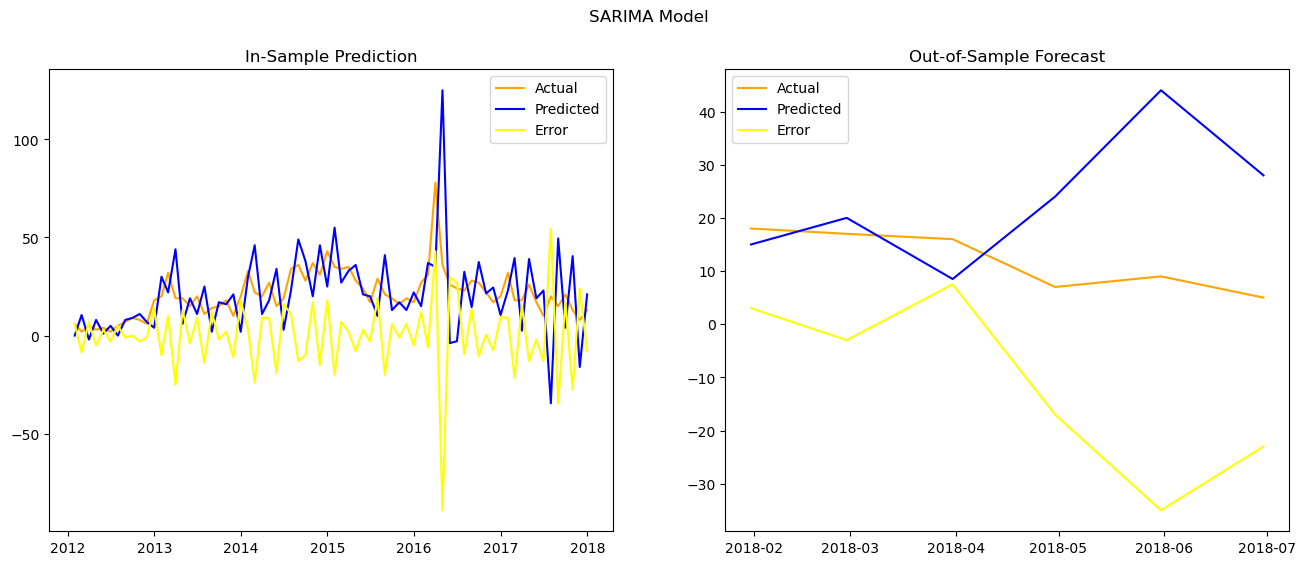

In [96]:
saim_train = pd.DataFrame({'Actual':train_pos,'Predicted':sarima_train_pred})
saim_test = pd.DataFrame({'Actual':test_pos,'Predicted':sarima_test_pred})
saim_train['Error']=saim_train['Actual']-saim_train['Predicted']
saim_test['Error']=saim_test['Actual']-saim_test['Predicted']
plt.subplots(1,2,figsize=(16,6))
plt.subplot(1,2,1)

plt.plot(saim_train['Actual'],color='orange',label='Actual')
plt.plot(saim_train['Predicted'],color='blue',label='Predicted')
plt.plot(saim_train['Error'],color='yellow',label='Error')
plt.title('In-Sample Prediction')
plt.legend()
plt.subplot(1,2,2)

plt.plot(saim_test['Actual'],color='orange',label='Actual')
plt.plot(saim_test['Predicted'],color='blue',label='Predicted')
plt.plot(saim_test['Error'],color='yellow',label='Error')
plt.title('Out-of-Sample Forecast')
plt.legend()
plt.suptitle('SARIMA Model');

In [97]:
np.sqrt(mean_squared_error(saim_test.Actual,saim_test.Predicted))

18.784967184560465

In [98]:
np.sqrt(mean_squared_error(saim_train.Actual,saim_train.Predicted))

18.768854036680704

## Positive Forecast

In [99]:
fortp=sarima.forecast(len(test_pos)+21)

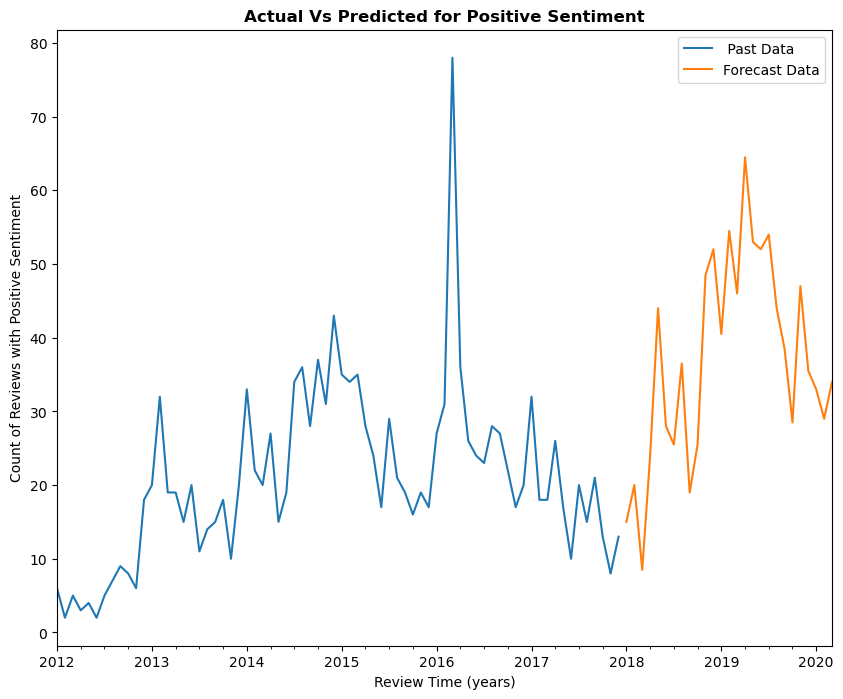

In [100]:
train_pos.plot(figsize=(10,8),legend=True,sharex=True,label=' Past Data')
# test_pos.plot(figsize=(10,8),legend=True,sharex=True)
fortp.plot(legend=True,label='Forecast Data')
plt.ylabel('Count of Reviews with Positive Sentiment')
plt.xlabel('Review Time (years)')
plt.title('Actual Vs Predicted for Positive Sentiment',fontweight='bold')
plt.show()

#Interpretation - Their is a hike in positive sentiments in the 2016 to 2018 then there is a downfall in the positive sentiments. 

## Negative Sentiment

In [149]:
train_neg=negative1[(negative1.index.year >= 2013)& (negative1.index.year <= 2016)]
test_neg=negative1[(negative1.index.year > 2016)]

In [150]:
sarima11 = SARIMAX(train_neg,order=(1,2,1),seasonal_order=(3,2,4,52)).fit()
sarima11_train_pred = sarima11.predict(0,(len(train_neg)-1))
sarima11_test_pred = sarima11.predict(len(train_neg),(len(train_neg)+len(test_neg)-1))
print(sarima11.summary())
ljung11 = sm.stats.acorr_ljungbox(sarima.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(f'LJung Box Test Value : {ljung11}')

                                           SARIMAX Results                                           
Dep. Variable:                                    reviewerID   No. Observations:                   48
Model:             SARIMAX(1, 2, 1)x(3, 2, [1, 2, 3, 4], 52)   Log Likelihood                   0.000
Date:                                       Mon, 15 May 2023   AIC                             20.000
Time:                                               13:17:53   BIC                                nan
Sample:                                           01-31-2013   HQIC                               nan
                                                - 12-31-2016                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0     

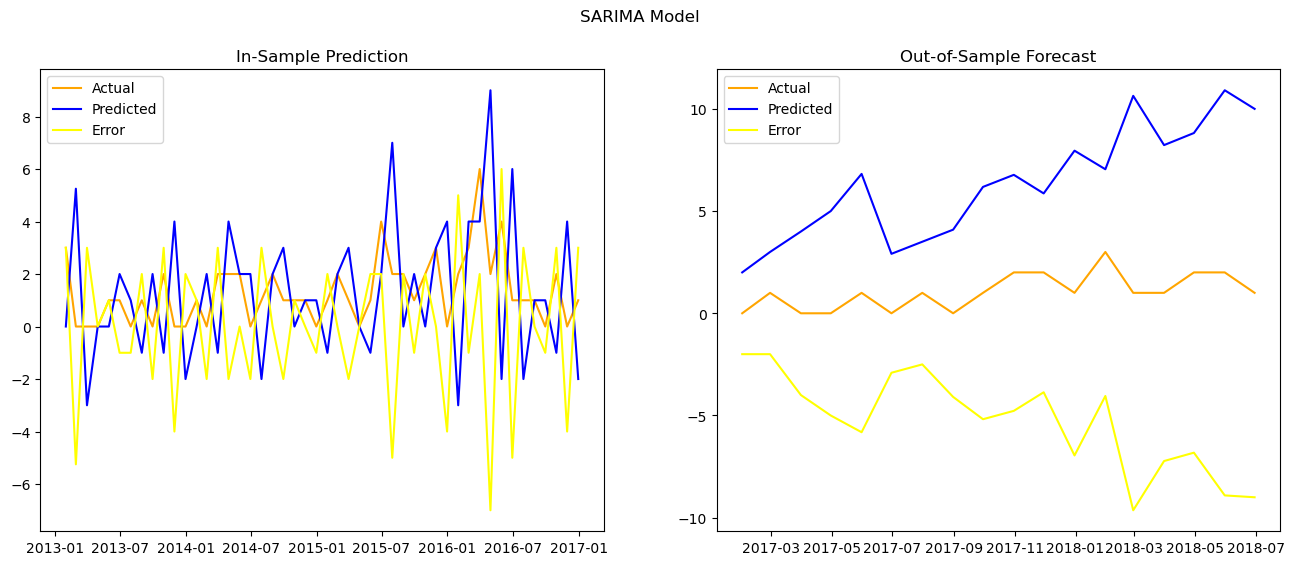

In [151]:
saim11_train = pd.DataFrame({'Actual':train_neg,'Predicted':sarima11_train_pred})
saim11_test = pd.DataFrame({'Actual':test_neg,'Predicted':sarima11_test_pred})
saim11_train['Error']=saim11_train['Actual']-saim11_train['Predicted']
saim11_test['Error']=saim11_test['Actual']-saim11_test['Predicted']
plt.subplots(1,2,figsize=(16,6))
plt.subplot(1,2,1)

plt.plot(saim11_train['Actual'],color='orange',label='Actual')
plt.plot(saim11_train['Predicted'],color='blue',label='Predicted')
plt.plot(saim11_train['Error'],color='yellow',label='Error')
plt.title('In-Sample Prediction')
plt.legend()
plt.subplot(1,2,2)

plt.plot(saim11_test['Actual'],color='orange',label='Actual')
plt.plot(saim11_test['Predicted'],color='blue',label='Predicted')
plt.plot(saim11_test['Error'],color='yellow',label='Error')
plt.title('Out-of-Sample Forecast')
plt.legend()
plt.suptitle('SARIMA Model');

In [152]:
np.sqrt(mean_squared_error(saim11_test.Actual,saim11_test.Predicted))

5.752009778127918

In [153]:
np.sqrt(mean_squared_error(saim11_train.Actual,saim11_train.Predicted))

2.785986143363892

## Negative Forecast

In [154]:
fortng=sarima11.forecast(len(test_neg)+20)

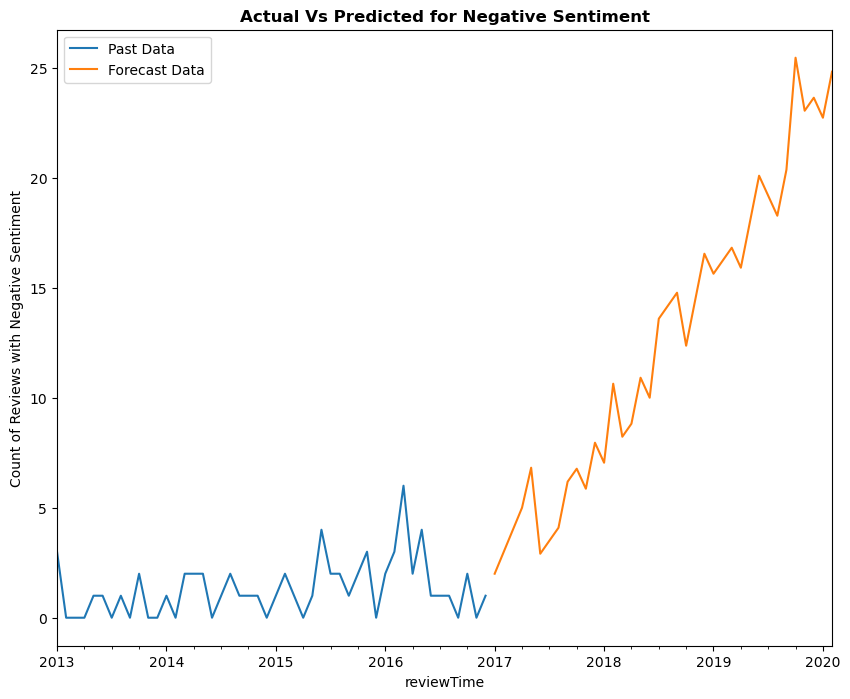

In [155]:
train_neg.plot(figsize=(10,8),legend=True,sharex=True,label='Past Data')
# test_neg.plot(figsize=(10,8),legend=True,sharex=True)
fortng.plot(legend=True,label='Forecast Data')
plt.ylabel('Count of Reviews with Negative Sentiment')
plt.title('Actual Vs Predicted for Negative Sentiment',fontweight='bold')
plt.show()

## Neutral Sentiment

In [146]:
train_neu=neutral1[(neutral1.index.year >= 2008) & (neutral1.index.year <= 2015)]
test_neu=neutral1[(neutral1.index.year > 2015)]

In [147]:
sarima12 = SARIMAX(train_neu,order=(1,1,1),seasonal_order=(1,1,1,52)).fit()
sarima12_train_pred = sarima12.predict(0,(len(train_neu)-1))
sarima12_test_pred = sarima12.predict(len(train_neu),(len(train_neu)+len(test_neu)-1))
print(sarima11.summary())
ljung12 = sm.stats.acorr_ljungbox(sarima12.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(f'LJung Box Test Value : {ljung12}')

                                           SARIMAX Results                                           
Dep. Variable:                                    reviewerID   No. Observations:                   75
Model:             SARIMAX(1, 2, 1)x(3, 2, [1, 2, 3, 4], 52)   Log Likelihood                   0.000
Date:                                       Mon, 10 Apr 2023   AIC                             20.000
Time:                                               11:23:14   BIC                                nan
Sample:                                           10-31-2011   HQIC                               nan
                                                - 12-31-2017                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0     

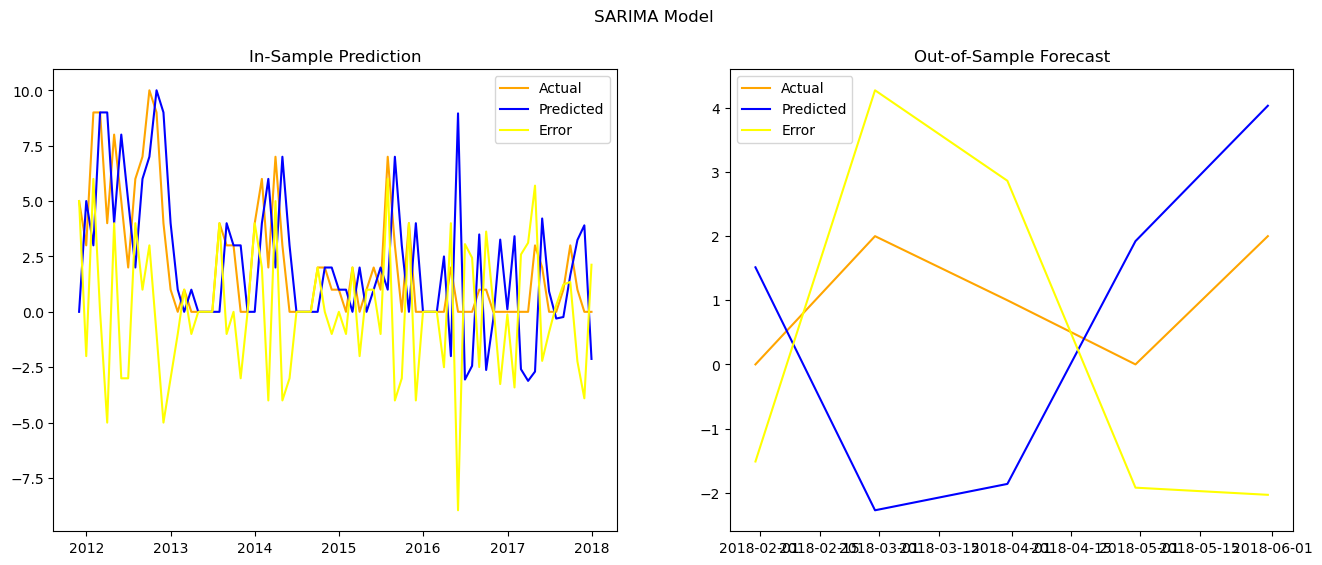

In [148]:
saim12_train = pd.DataFrame({'Actual':train_neu,'Predicted':sarima12_train_pred})
saim12_test = pd.DataFrame({'Actual':test_neu,'Predicted':sarima12_test_pred})
saim12_train['Error']=saim12_train['Actual']-saim12_train['Predicted']
saim12_test['Error']=saim12_test['Actual']-saim12_test['Predicted']
plt.subplots(1,2,figsize=(16,6)) 

plt.subplot(1,2,1)
plt.plot(saim12_train['Actual'],color='orange',label='Actual')
plt.plot(saim12_train['Predicted'],color='blue',label='Predicted')
plt.plot(saim12_train['Error'],color='yellow',label='Error')
plt.title('In-Sample Prediction')
plt.legend()
plt.subplot(1,2,2)

plt.plot(saim12_test['Actual'],color='orange',label='Actual')
plt.plot(saim12_test['Predicted'],color='blue',label='Predicted')
plt.plot(saim12_test['Error'],color='yellow',label='Error')
plt.title('Out-of-Sample Forecast')
plt.legend()
plt.suptitle('SARIMA Model');

In [149]:
np.sqrt(mean_squared_error(saim12_test.Actual,saim12_test.Predicted))

2.7054598147257316

In [150]:
np.sqrt(mean_squared_error(saim12_train.Actual,saim12_train.Predicted))

2.9691193532724482

### Neutral Forecast

In [151]:
fortne=sarima12.forecast(len(test_neu)+21)

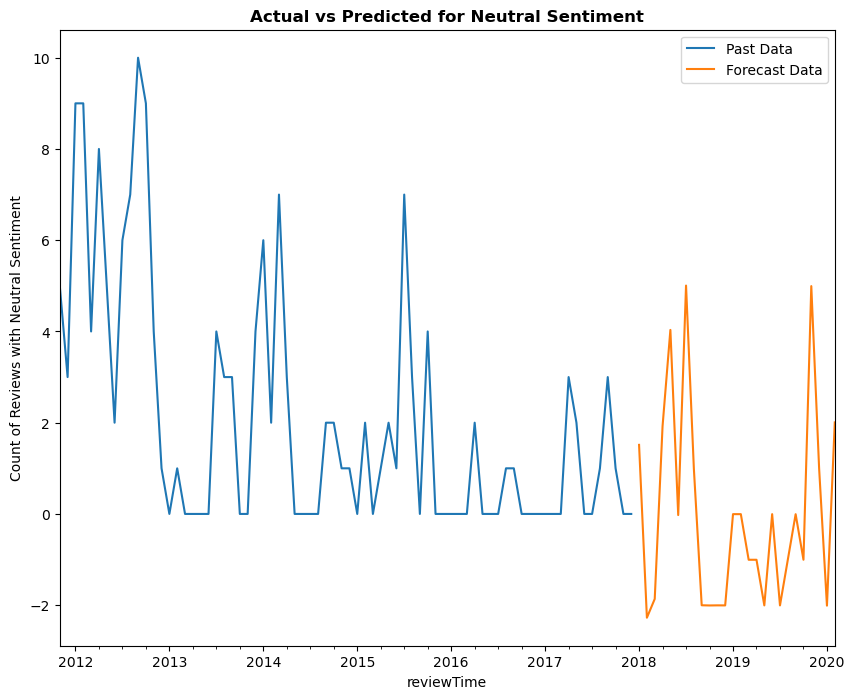

In [152]:
train_neu.plot(figsize=(10,8),legend=True,sharex=True,label='Past Data')
# test_neu.plot(figsize=(10,8),legend=True,sharex=True)
fortne.plot(legend=True,label='Forecast Data')
plt.ylabel('Count of Reviews with Neutral Sentiment')
plt.title('Actual vs Predicted for Neutral Sentiment',fontweight='bold')
plt.show()

Interpretation
- From the visualisation we can see how the sentiments distributed over the years as well as months, the mean and the variation is almost same over the period.

<AxesSubplot:xlabel='year', ylabel='count'>

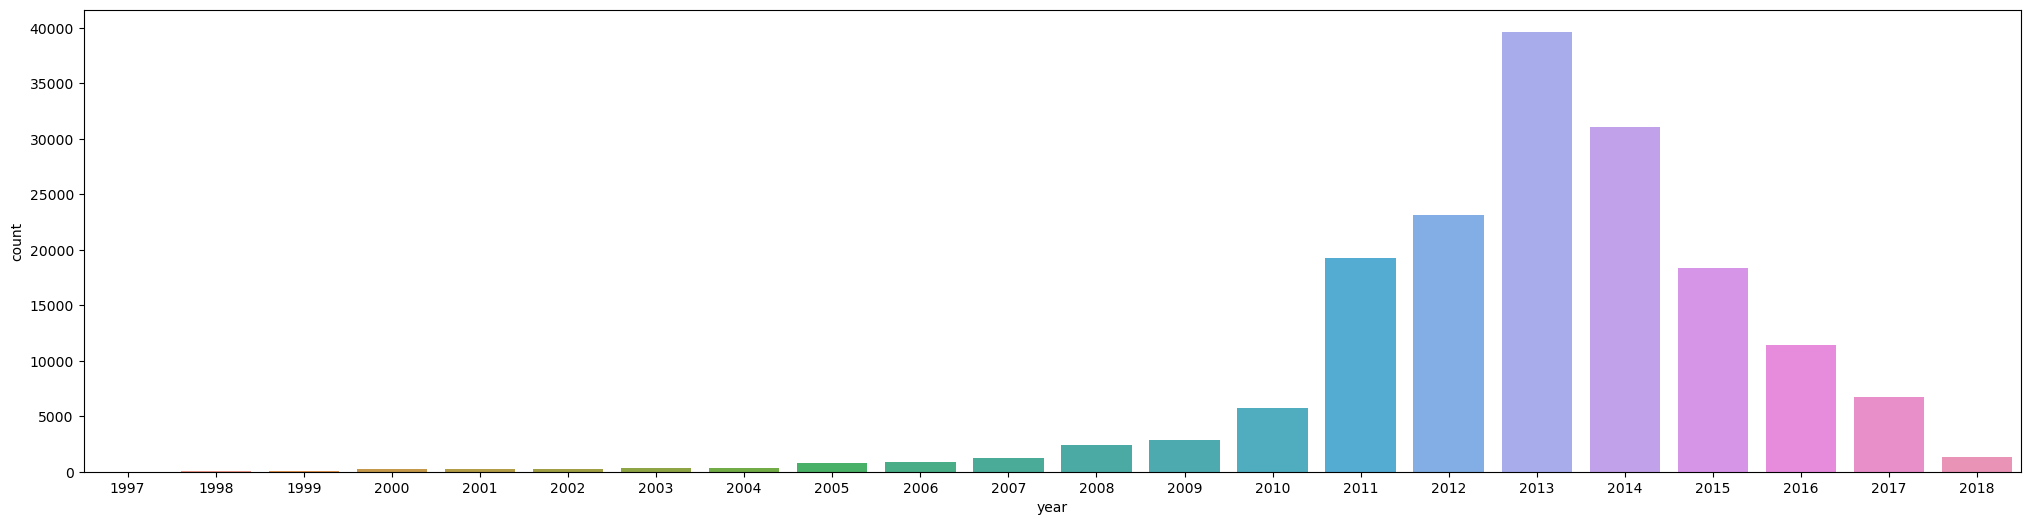

In [97]:
plt.figure(figsize=(25, 6))
sns.countplot(df.year)

<AxesSubplot:xlabel='month', ylabel='count'>

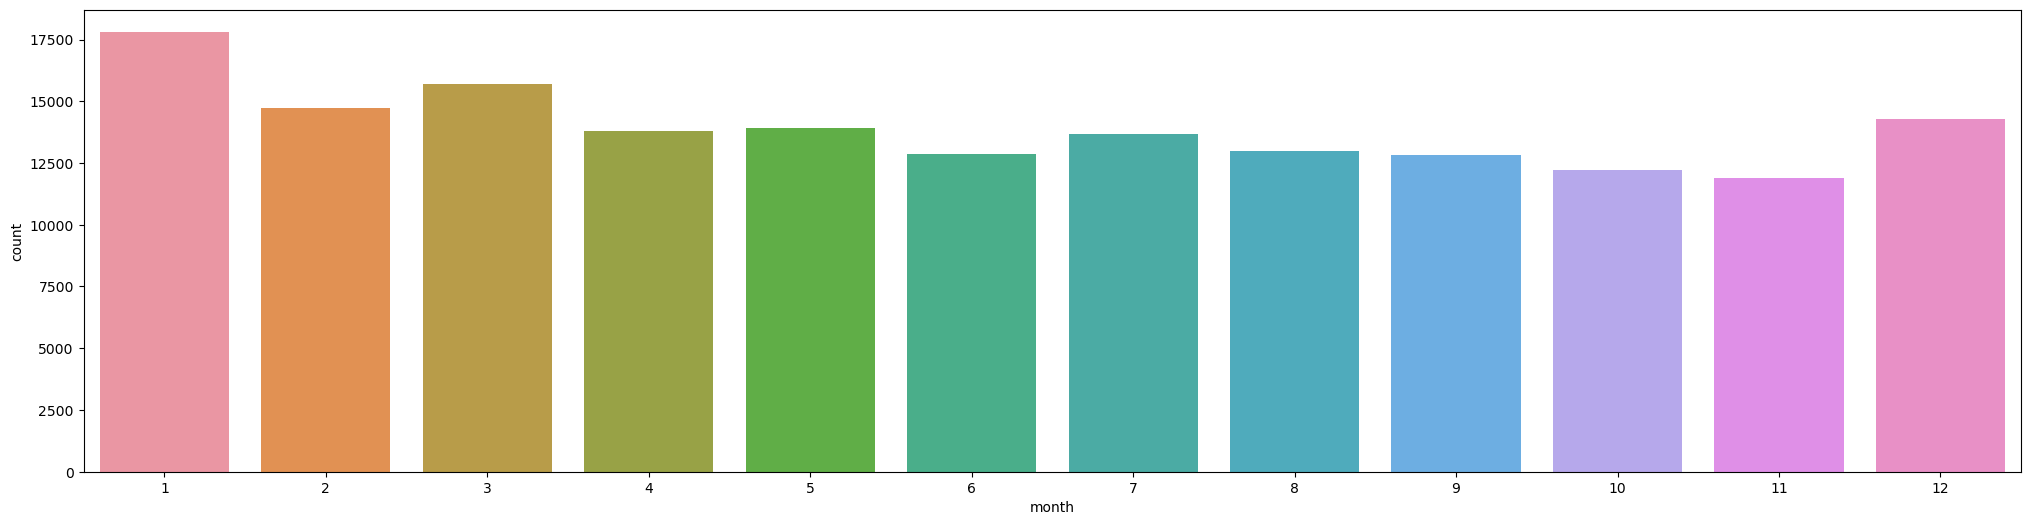

In [98]:
plt.figure(figsize=(25, 6))
sns.countplot(df.month)

# Clustering

Cluster analysis is the grouping of objects such that objects in the same cluster are more similar to each other than they are to objects in another cluster. The classification into clusters is done using criteria such as smallest distances, density of data points, graphs, or various statistical distributions.

In [99]:
df.shape

(166706, 18)

In [100]:
df.head(1)

,Class,asin,overall,unixReviewTime,reviewerName,reviewTime,reviewerID,verified,category,brand,text,Sentiment,neg,neu,pos,compound,year,month
0,pos,B000FA5KK0,3.0,1412985600,Timothy Isaacson,2014-10-11,A36PGTGIU6TWY2,True,"['Kindle Store', 'Kindle eBooks', 'Literature ...",Visit Amazon's Max Brand Page,enjoyed read bit twist fun trying figure going...,Neutral,0.0,0.606,0.394,0.8442,2014,10


In [128]:
X = df.iloc[:10000]
X.head(3)

,Class,asin,overall,unixReviewTime,reviewerName,reviewTime,reviewerID,verified,category,brand,text,Sentiment,neg,neu,pos,compound,year,month
0,pos,B000FA5KK0,3.0,1412985600,Timothy Isaacson,2014-10-11,A36PGTGIU6TWY2,True,"['Kindle Store', 'Kindle eBooks', 'Literature ...",Visit Amazon's Max Brand Page,enjoyed read bit twist fun trying figure going...,Neutral,0.000,0.606,0.394,0.8442,2014,10
1,pos,B000FA5KK0,5.0,1412467200,George,2014-10-05,A176WT5VCAX69W,True,"['Kindle Store', 'Kindle eBooks', 'Literature ...",Visit Amazon's Max Brand Page,enjoyed work author five stars,Positive,0.000,0.548,0.452,0.5106,2014,10
2,pos,B000FA5KK0,4.0,1404345600,sandra sue marsolek,2014-07-03,A2LSKD2H9U8N0J,True,"['Kindle Store', 'Kindle eBooks', 'Literature ...",Visit Amazon's Max Brand Page,pretty good story little exaggerated liked pre...,Positive,0.024,0.309,0.666,0.9818,2014,7


In [129]:
X.shape

(10000, 18)

In [130]:
X1 = X[['compound','unixReviewTime']]

In [104]:
#X1['text'] = X1['text'].astype(str)
X1['reviewerName'] = X1['reviewerName'].astype(str)
encoder = LabelEncoder()
#X1['text'] = encoder.fit_transform(X1['text'])
X1['reviewerName'] = encoder.fit_transform(X1['reviewerName'])

KeyError: 'reviewerName'

In [131]:
X1.dtypes

compound          float64
unixReviewTime      int64
dtype: object

In [132]:
#Scaling the data
#Scaler = StandardScaler()
#for i in X1.columns:
##   X1[i] = Scaler.fit_transform(np.array(X1[i]).reshape(-1, 1))

In [133]:
X2 = pd.DataFrame(X1)

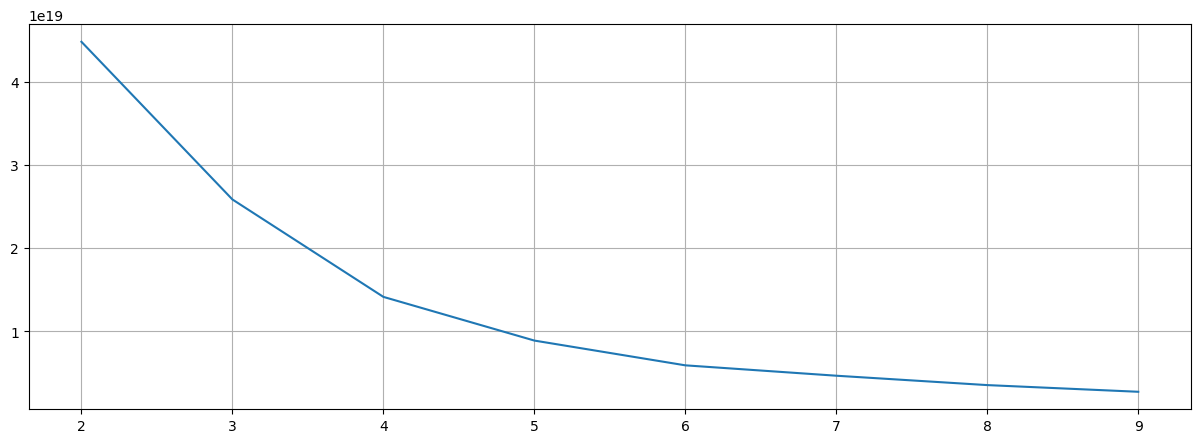

In [134]:
X2 = X2.values
distortion = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i).fit(X2)
    distortion.append(kmeans.inertia_)
plt.figure(figsize = (15, 5))
plt.plot(range(2, 10), distortion)
plt.grid(True)

In [137]:
# Making the model and fitting it
model1 = KMeans(n_clusters = 3, random_state = 42).fit(X2)
pred = model1.fit_predict(X2)

In [138]:
c_centre = model1.cluster_centers_
c_centre

array([[6.23794956e-01, 1.25278607e+09],
       [5.70251106e-01, 1.42044749e+09],
       [5.71642656e-01, 1.06928217e+09]])

In [139]:
k_label = model1.labels_
k_label

array([1, 1, 1, ..., 0, 0, 0])

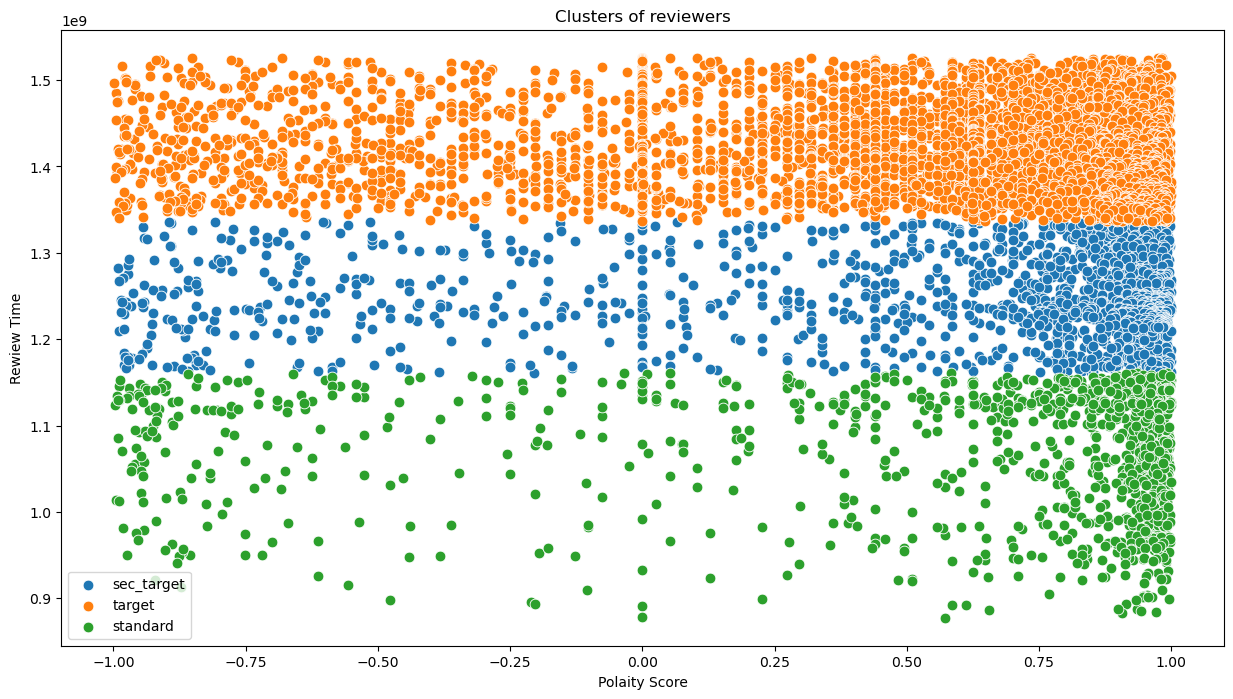

In [141]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=X2[pred==0,0] ,y=X2[pred==0,1] ,s=60,label ='sec_target')
sns.scatterplot(x=X2[pred==1,0] ,y=X2[pred==1,1],s=60,label ='target')
sns.scatterplot(x=X2[pred==2,0] ,y=X2[pred==2,1] ,s=60,label ='standard')
#sns.scatterplot(x=kmeans.cluster_centers_[:,0] ,y= kmeans.cluster_centers_[:,1] ,s=300,label="center")
plt.title("Clusters of reviewers")
plt.ylabel("Rewiew Time")
plt.xlabel("Polaity Score");

- Interpretation 
1. This graph illustrates the relation between the review time and the category of the product where each cluster shows the grouping of reviews on the particular category.

2. The orange cluster represents reviews with the highest and lowest ratings (5 and 1). These reviews were likely submitted quickly, as customers tend to express strong opinions when they either like or dislike a product.

3. The red cluster shows the categories in which the maximum time is taken to review the product so it can be either extremely good or bad products. So , we need to focus more on these categories as the customers are either strongly satisfied or dissatisfied with the products. If the customers are satisfied then , we need to increase the production of these products and if he customers are dissatisfied , then we should improve the qulality of the product to enhance the sales.